# 1.Configuración del Ambiente

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Obtención de los datos

## 2.1 Generando el DataFrame

In [ ]:
path = "https://raw.githubusercontent.com/JorgeHdzRiv/Desafios_Alura_DS/refs/heads/main/EsenciaCliente/data/media_prediction_cost.csv"

df = pd.read_csv(path)
df.head()

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [ ]:
df.columns

Index(['food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

## 2.2 Renombrar columnas a partir de diccionario

### Agregando el diccionario

In [ ]:
class Diccionarios:
  def __init__(self):
    self.categoria_alimento = {
      'Vegetables': 'Vegetales',
      'Snack Foods': 'Alimentos para picar',
      'Dairy': 'Productos lácteos',
      'Meat': 'Carne',
      'Fruit': 'Fruta',
      'Jams and Jellies': 'Mermeladas y jaleas',
      'Baking Goods': 'Productos para hornear',
      'Breakfast Foods': 'Alimentos para el desayuno',
      'Bread': 'Pan',
      'Canned Soup': 'Sopa enlatada',
      'Beer and Wine': 'Cerveza y vino',
      'Paper Products': 'Productos de papel',
      'Bathroom Products': 'Productos de baño',
      'Electrical': 'Eléctrico',
      'Candy': 'Dulces',
      'Frozen Desserts': 'Postres congelados',
      'Specialty': 'Especialidades',
      'Starchy Foods': 'Alimentos ricos en almidón',
      'Magazines': 'Revistas',
      'Kitchen Products': 'Productos de cocina',
      'Eggs': 'Huevos',
      'Hot Beverages': 'Bebidas calientes',
      'Hygiene': 'Higiene',
      'Pain Relievers': 'Analgésicos',
      'Pizza': 'Pizza',
      'Carbonated Beverages': 'Bebidas carbonatadas',
      'Pure Juice Beverages': 'Bebidas de jugo puro',
      'Cleaning Supplies': 'Suministros de limpieza',
      'Side Dishes': 'Acompañamientos',
      'Frozen Entrees': 'Platos preparados congelados',
      'Drinks': 'Bebidas',
      'Plastic Products': 'Productos de plástico',
      'Hardware': 'Artículos de ferretería',
      'Cold Remedies': 'Remedios para el resfriado',
      'Decongestants': 'Descongestionantes',
      'Canned Tuna': 'Atún enlatado',
      'Seafood': 'Mariscos',
      'Canned Anchovies': 'Anchoas enlatadas',
      'Canned Clams': 'Almejas enlatadas',
      'Candles': 'Velas',
      'Miscellaneous': 'Misceláneos',
      'Canned Oysters': 'Ostras enlatadas',
      'Canned Shrimp': 'Camarones enlatados',
      'Packaged Vegetables': 'Vegetales envasados',
      'Canned Sardines': 'Sardinas enlatadas'}

    self.departamento = {
      'Produce': 'Productos frescos',
      'Snack Foods': 'Alimentos para picar',
      'Household': 'Artículos para el hogar',
      'Frozen Foods': 'Alimentos congelados',
      'Baking Goods': 'Productos para hornear',
      'Canned Foods': 'Alimentos enlatados',
      'Dairy': 'Productos lácteos',
      'Health and Hygiene': 'Salud e higiene',
      'Beverages': 'Bebidas',
      'Deli': 'Charcutería',
      'Baked Goods': 'Productos horneados',
      'Alcoholic Beverages': 'Bebidas alcohólicas',
      'Snacks': 'Snacks',
      'Starchy Foods': 'Alimentos ricos en almidón',
      'Periodicals': 'Publicaciones periódicas',
      'Eggs': 'Huevos',
      'Breakfast Foods': 'Alimentos para el desayuno',
      'Canned Products': 'Productos enlatados',
      'Checkout': 'Caja de salida',
      'Meat': 'Carne',
      'Seafood': 'Mariscos',
      'Carousel': 'Carrusel'}

    self.tipo= {'Food':'Comida',
                  'Non-Consumable':'No comestible',
                  'Drink':'Bebida'}

    self.promocion = {
          'Weekend Markdown': 'Descuento de fin de semana',
          'Two Day Sale': 'Venta de dos días',
          'Price Savers': 'Ahorro de precios',
          'Price Winners': 'Ganadores de precios',
          'Save-It Sale': 'Venta Ahorra Ya',
          'Super Duper Savers': 'Super Ahorradores',
          'Super Savers': 'Super Ahorro',
          'One Day Sale': 'Venta de un día',
          'Double Down Sale': 'Venta Doble',
          'High Roller Savings': 'Ahorro para apostadores grandes',
          'Green Light Days': 'Días de luz verde',
          'Shelf Clearing Days': 'Días de liquidación de estanterías',
          'Price Slashers': 'Rebajadores de precios',
          'Free For All': 'Gratis para todos',
          'Cash Register Lottery': 'Lotería de la caja registradora',
          'Go For It': 'Adelante',
          'Two for One': 'Dos por uno',
          'Money Savers': 'Ahorradores de dinero',
          'Big Time Discounts': 'Descuentos de gran magnitud',
          'Price Destroyers': 'Destructores de precios',
          'Saving Days': 'Días de ahorro',
          'Dollar Cutters': 'Recortadores de dólares',
          'Unbeatable Price Savers': 'Ahorro de precios imbatible',
          'Sales Galore': 'Promociones por montones',
          'Big Promo': 'Gran promoción',
          'Dimes Off': 'Más barato',
          'Sales Days': 'Días de venta',
          'Price Cutters': 'Rebajando precios',
          'You Save Days': 'Días de ahorro',
          'Savings Galore': 'Ahorros por montones',
          'Bag Stuffers': 'Bolsas llenas',
          'Three for One': 'Tres por uno',
          'I Cant Believe It Sale': 'Venta No Puedo Creerlo',
          'Sale Winners': 'Ganadores de ventas',
          'Pick Your Savings': 'Elige tus ahorros',
          'Bye Bye Baby': 'Adiós bebé',
          'Best Savings': 'Mejores ahorros',
          'Tip Top Savings': 'Ahorro de primera clase',
          'Shelf Emptiers': 'Estantes vacíos',
          'Big Time Savings': 'Ahorro Enorme',
          'Wallet Savers': 'Ahorradores de billetera',
          'Dollar Days': 'Días de dólar',
          'Mystery Sale': 'Venta misteriosa',
          'Price Smashers': 'Aplastadores de precios',
          'Green Light Special': 'Especial luz verde',
          'Coupon Spectacular': 'Espectacular de cupones',
          'Super Wallet Savers': 'Super ahorradores de billetera',
          'Double Your Savings': 'Duplica tus ahorros',
          'Fantastic Discounts': 'Descuentos fantásticos'}

    self.escolaridad = {
          'Partial High School':'Primaria',
          'High School Degree':'Secundaria',
          'Bachelors Degree':'Superior',
          'Partial College':'Técnico',
          'Graduate Degree':'Maestría'}

    self.miembro = {
      'Bronze':'Bronce',
      'Golden': 'Oro',
      'Silver':'Plata'}

    self.ocupacion = {
      'Professional':'Profesional',
      'Skilled Manual':'Técnico',
      'Manual':'Obrero',
      'Management':'Gestión',
      'Clerical':'Cargo de Oficina'}

    self.pais = {
      'USA':'Estados Unidos',
      'Mexico':'México',
      'Canada':'Canadá'}

    self.estado_civil = {
      'S':'Soltero', 'M':'Casado'}

    self.genero ={
    'F':'Femenino', 'M':'Masculino'}

    self.vivienda_propia={'Y':'Sí', 'N':'No'}

    self.ingreso_anual={
      '$30K - $50K':40000,
      '$10K - $30K':20000,
      '$50K - $70K':60000,
      '$70K - $90K':80000,
      '$130K - $150K':140000,
      '$90K - $110K':100000,
      '$110K - $130K':120000,
      '$150K +':160000}

    self.comercio = {
      'Supermarket': 'Supermercado',
      'Deluxe Supermarket': 'Supermercado de lujo',
      'Gourmet Supermarket': 'Supermercado gourmet',
      'Mid-Size Grocery': 'Supermercado mediano',
      'Small Grocery': 'Pequeño supermercado'}


    self.divulgacion = {
      'Daily Paper, Radio': 'Periódico diario, radio',
      'Product Attachment': 'Anexo del producto',
      'Daily Paper, Radio, TV': 'Periódico diario, radio, televisión',
      'Daily Paper': 'Periódico diario',
      'Street Handout': 'Panfletos',
      'Radio': 'Radio',
      'Sunday Paper': 'Periódico dominical',
      'In-Store Coupon': 'Cupón en la tienda',
      'Sunday Paper, Radio': 'Periódico dominical, radio',
      'Cash Register Handout': 'Entrega en el punto de venta',
      'TV': 'Televisión',
      'Bulk Mail': 'Correo masivo',
      'Sunday Paper, Radio, TV': 'Periódico dominical, radio, televisión'}

    self.columnas = {
      'food_category': 'categoria_alimento',
      'food_department': 'departamento',
      'food_family': 'tipo',
      'store_sales(in millions)': 'ventas_tienda(en millones)',
      'store_cost(in millions)': 'costo_tienda(en millones)',
      'unit_sales(in millions)': 'ventas_unitarias(en millones)',
      'promotion_name': 'promocion',
      'sales_country': 'pais',
      'marital_status': 'estado_civil',
      'gender': 'genero',
      'total_children': 'total_de_hijos',
      'education': 'escolaridad',
      'member_card': 'miembro',
      'occupation': 'ocupacion',
      'houseowner': 'vivienda_propia',
      'avg_cars_at home(approx)': 'promedio_autos(aprox)',
      'avg. yearly_income': 'ingreso_anual',
      'num_children_at_home': 'numero_hijos',
      'avg_cars_at home(approx).1': 'promedio_autos(aprox)',
      'brand_name': 'marca',
      'SRP': 'precio_recomendado',
      'gross_weight': 'peso_bruto',
      'net_weight': 'peso_neto',
      'recyclable_package': 'empaque_reciclable',
      'low_fat': 'bajo_en_grasa',
      'units_per_case': 'unidades_por_caja',
      'store_type': 'comercio',
      'store_city': 'ciudad',
      'store_state': 'estado',
      'store_sqft': 'pies_cuadrados_tienda',
      'grocery_sqft': 'pies_cuadrados_comestibles',
      'frozen_sqft': 'pies_cuadrados_congelados',
      'meat_sqft': 'pies_cuadrados_carne',
      'coffee_bar': 'cafeteria',
      'video_store': 'tienda_de_videos',
      'salad_bar': 'barra_de_ensaladas',
      'prepared_food': 'comida_preparada',
      'florist': 'floristeria',
      'media_type': 'divulgacion',
      'cost': 'costo'}

### Instanciando la clase Diccionarios

In [ ]:
diccionarios = Diccionarios()

In [ ]:
print(diccionarios.columnas)

{'food_category': 'categoria_alimento', 'food_department': 'departamento', 'food_family': 'tipo', 'store_sales(in millions)': 'ventas_tienda(en millones)', 'store_cost(in millions)': 'costo_tienda(en millones)', 'unit_sales(in millions)': 'ventas_unitarias(en millones)', 'promotion_name': 'promocion', 'sales_country': 'pais', 'marital_status': 'estado_civil', 'gender': 'genero', 'total_children': 'total_de_hijos', 'education': 'escolaridad', 'member_card': 'miembro', 'occupation': 'ocupacion', 'houseowner': 'vivienda_propia', 'avg_cars_at home(approx)': 'promedio_autos(aprox)', 'avg. yearly_income': 'ingreso_anual', 'num_children_at_home': 'numero_hijos', 'avg_cars_at home(approx).1': 'promedio_autos(aprox)', 'brand_name': 'marca', 'SRP': 'precio_recomendado', 'gross_weight': 'peso_bruto', 'net_weight': 'peso_neto', 'recyclable_package': 'empaque_reciclable', 'low_fat': 'bajo_en_grasa', 'units_per_case': 'unidades_por_caja', 'store_type': 'comercio', 'store_city': 'ciudad', 'store_stat

### Aplicando los diccionarios

In [ ]:
# Renombrar las columnas del dataframe
df.rename(columns=diccionarios.columnas, inplace=True)
df.head()

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,...,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [ ]:
# Ciclo para cada columna del dataframe
for column in df.columns:
    # Verificar si existe un diccionario con el nombre de la columna
    if hasattr(diccionarios, column):
        # Obtener el diccionario correspondiente a la columna
        translation_dict = getattr(diccionarios, column)

        # Traducir los valores de la columna usando el diccionario
        df[column] = df[column].map(translation_dict).fillna(df[column])

# Asegurar la traduccion
df.head()

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,...,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


## 2.3 Exportar DataFrame traducido

In [ ]:
''' El guardado sera opcional en dado caso que el usuario requiera guardar
la traduccion del dataframe generado, sin embargo en el repositorio se incluyen
los dataset original y traducido

# ------------------------Codigo para guardar en ruta drive ------------

# Ruta Guardado
output_path = '/content/drive/MyDrive/DATA/media_prediction_cost_esp.csv'

# Exportar el dataframe a un archivo .csv
df.to_csv(output_path, index=False)

# Confirmacion
print(f"El dataset traducido se ha guardado en: {output_path}")

'''


' El guardado sera opcional en dado caso que el usuario requiera guardar\nla traduccion del dataframe generado, sin embargo en el repositorio se incluyen\nlos dataset original y traducido\n\n# ------------------------Codigo para guardar en ruta drive ------------\n\n# Ruta Guardado\noutput_path = \'/content/drive/MyDrive/DATA/media_prediction_cost_esp.csv\'\n\n# Exportar el dataframe a un archivo .csv\ndf.to_csv(output_path, index=False)\n\n# Confirmacion\nprint(f"El dataset traducido se ha guardado en: {output_path}")\n\n'

# 3.Exploración de los datos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importar datos traducidos desde un repositorio creado
df = pd.read_csv('https://raw.githubusercontent.com/JorgeHdzRiv/Desafios_Alura_DS/refs/heads/main/EsenciaCliente/data/media_prediction_cost_esp.csv')

In [ ]:
df.head()

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,...,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoria_alimento             60428 non-null  object 
 1   departamento                   60428 non-null  object 
 2   tipo                           60428 non-null  object 
 3   ventas_tienda(en millones)     60428 non-null  float64
 4   costo_tienda(en millones)      60428 non-null  float64
 5   ventas_unitarias(en millones)  60428 non-null  float64
 6   promocion                      60428 non-null  object 
 7   pais                           60428 non-null  object 
 8   estado_civil                   60428 non-null  object 
 9   genero                         60428 non-null  object 
 10  total_de_hijos                 60428 non-null  float64
 11  escolaridad                    60428 non-null  object 
 12  miembro                        60428 non-null 

## 3.1 Graficos de Barras y Top10(Categorias)

In [ ]:
def graficos_barras_top10(df, columna):
  # Grafico en general
  plt.figure(figsize=(12, 8))
  ax = sns.countplot(y=columna,
                     data=df,
                     hue=columna,
                     order=df[columna].value_counts().index[:10])
  # Etiquetas y titulos
  plt.xlabel("Frecuencia", fontsize=12)
  plt.ylabel(columna.title(), fontsize=12)
  plt.title(f"Top 10 {columna.title()} más frecuentes", fontsize=14, pad=20)

  # Anotaciones
  conteos = df[columna].value_counts()[:10]

  # Anotaciones en cada barra
  for i, v in enumerate(conteos):
    ax.text(v + 1, i, f"{v:,}",
            va="center",            # Alineación vertical al centro
            fontsize=10,            # Tamaño de fuente
            fontweight="bold")      # Negrita

  # Ajustar
  plt.tight_layout()

  # Cuadricula
  plt.grid(True, axis="x", linestyle="--", alpha=0.7)

  plt.show()

In [ ]:
def graficos_barras(df, columna):
  # Grafico en general
  plt.figure(figsize=(12, 8))
  ax = sns.countplot(y=columna,
                     data=df,
                     hue=columna,
                     order=df[columna].value_counts().index)
  # Etiquetas y titulos
  plt.xlabel("Frecuencia", fontsize=12)
  plt.ylabel(columna.title(), fontsize=12)
  plt.title(f"{columna.title()} más frecuentes", fontsize=14, pad=20)

  # Anotaciones
  conteos = df[columna].value_counts()

  # Anotaciones en cada barra
  for i, v in enumerate(conteos):
    ax.text(v + 1, i, f"{v:,}",
            va="center",            # Alineación vertical al centro
            fontsize=10,            # Tamaño de fuente
            fontweight="bold")      # Negrita

  # Ajustar
  plt.tight_layout()

  # Cuadricula
  plt.grid(True, axis="x", linestyle="--", alpha=0.7)

  plt.show()

### 3.1.1 Categoria Alimento

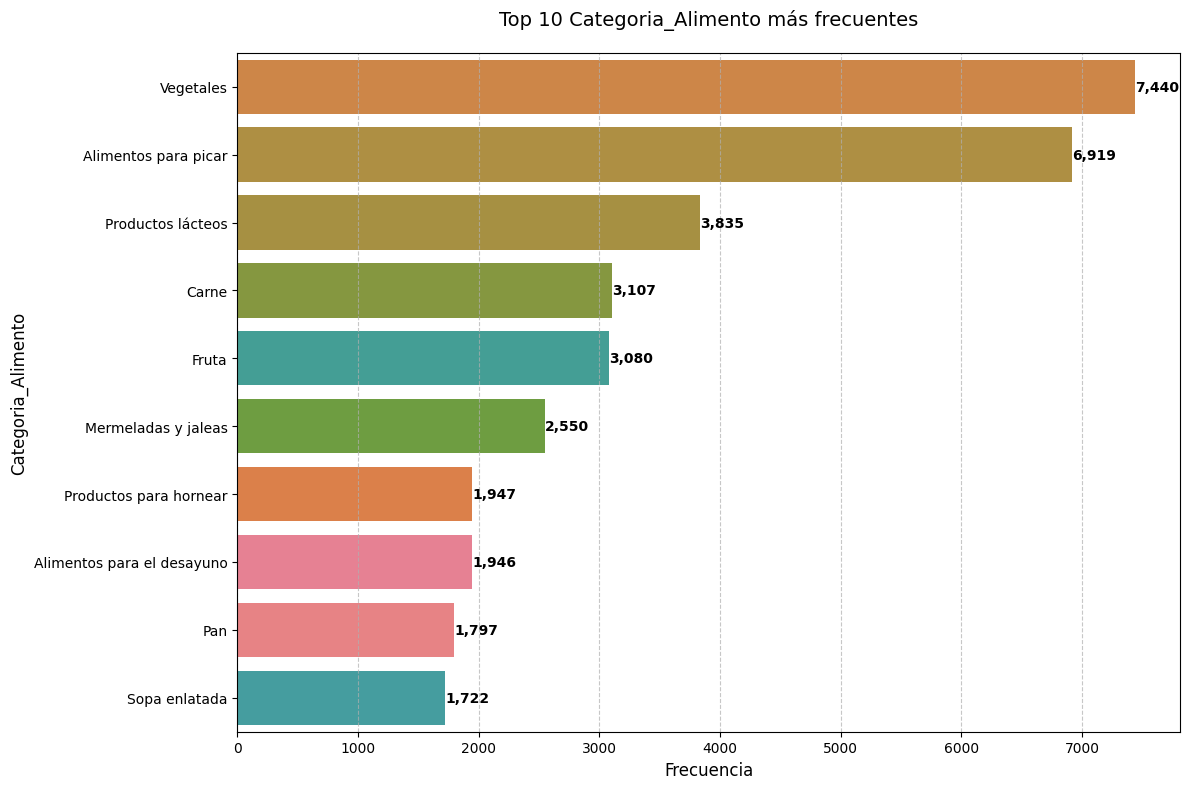

In [ ]:
graficos_barras_top10(df, "categoria_alimento")

**Podemos observar el top10 de categoria alimentos, donde se puede ver que los datos correspondientes a vegetales y alimentos para picar son el 24% de los datos de nuestro conjunto**

### 3.1.2 Categoria departamento

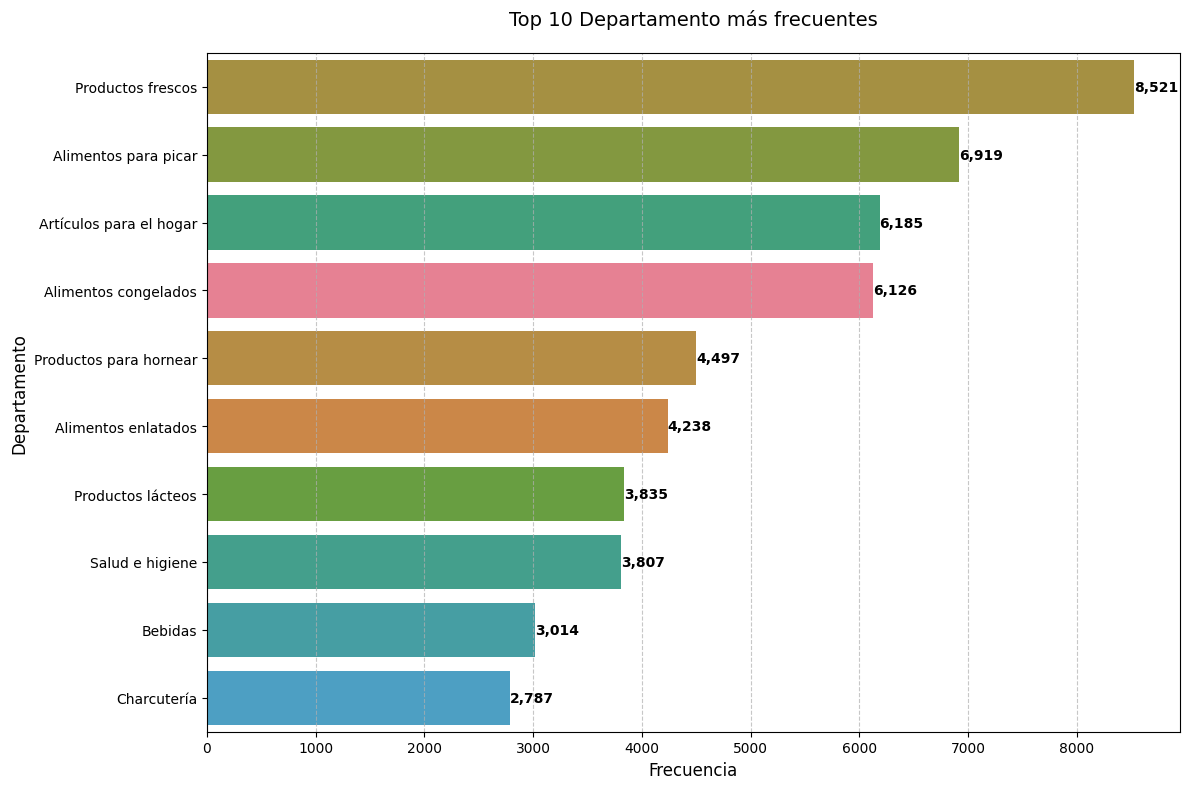

In [ ]:
graficos_barras_top10(df, "departamento")

**Se puede observar la relacion con la categoria de alimento, sin embargo hay que considerar que ademas de los vegetales otros productos pueden entrar en la categoria de productos frescos**

**Los primeros dos departamentos representan el 25.5% de datos del conjunto**

### 3.1.3 Tipo

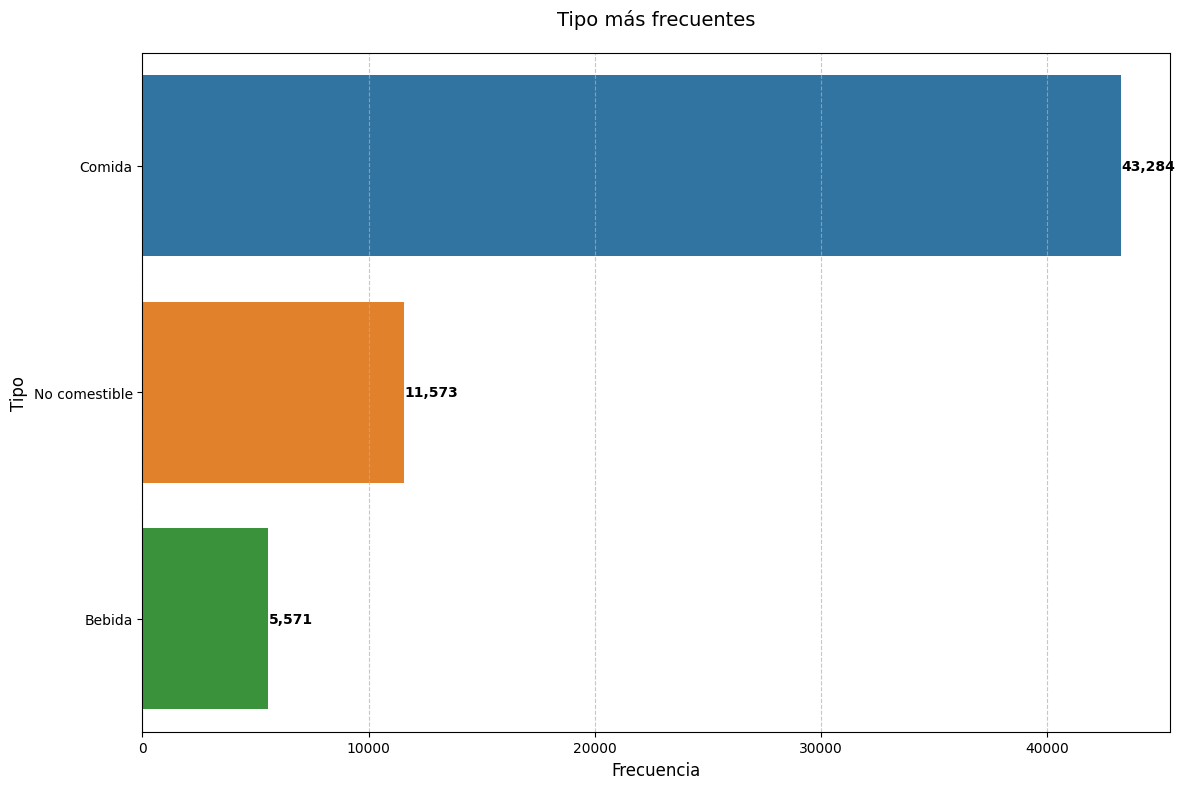

In [ ]:
graficos_barras(df, "tipo")

### 3.1.4 Escolaridad

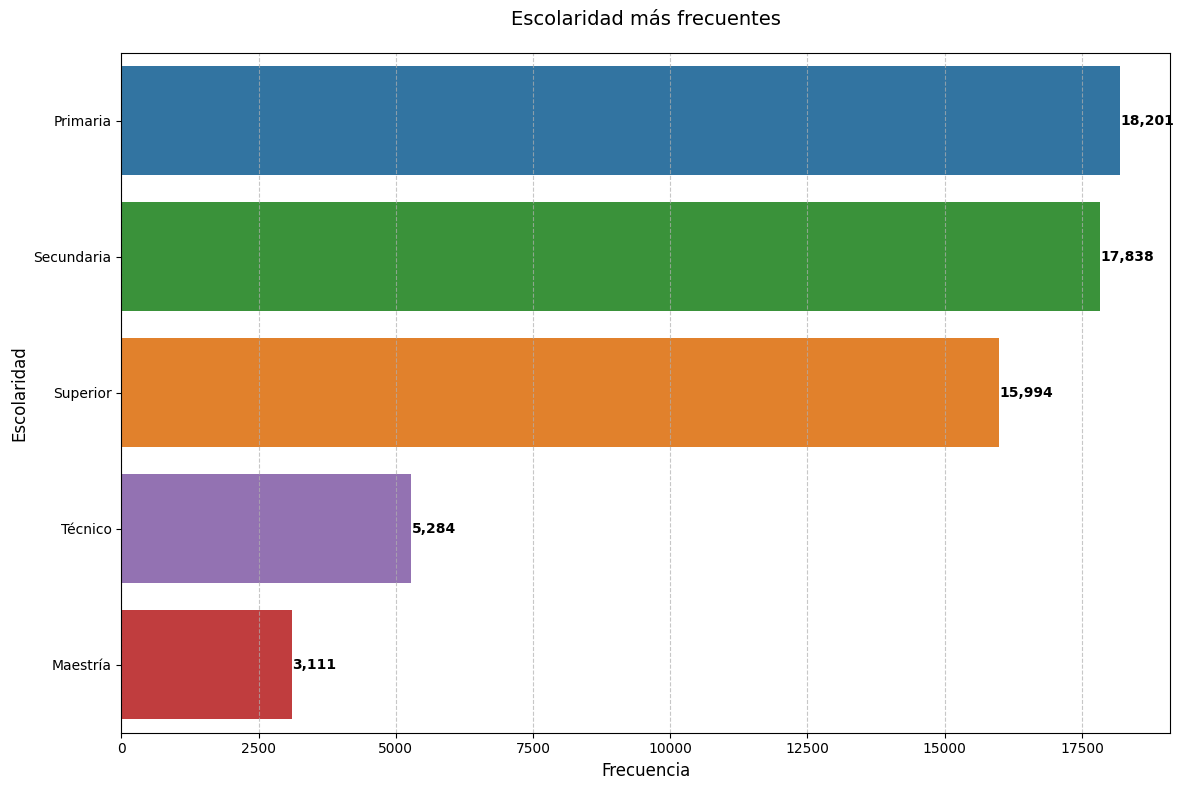

In [ ]:
graficos_barras(df, "escolaridad")

**Se puede observar que la escolaridad que predomina es primaria y secundaria**

### 3.1.5 Ocupaciones

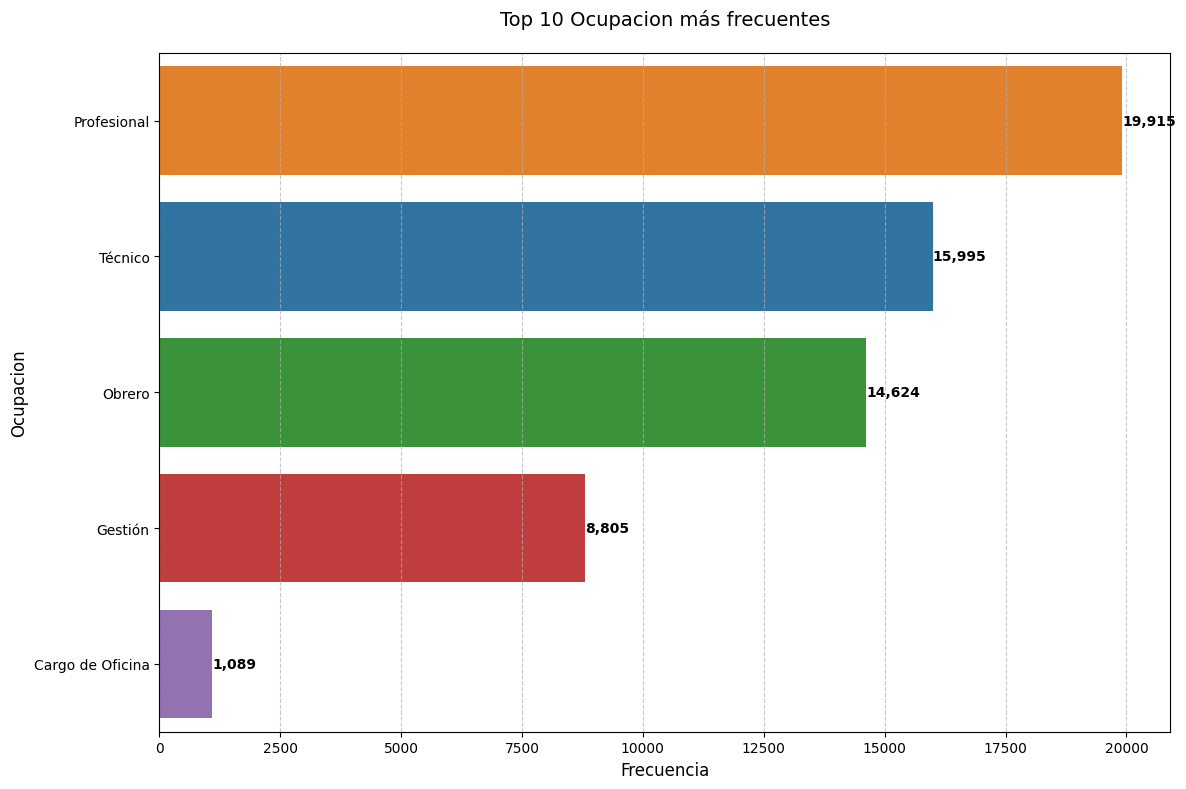

In [ ]:
graficos_barras_top10(df,"ocupacion")

**El gráfico proporciona una visión clara de la distribución de las 10 ocupaciones más frecuentes, resaltando la concentración en las tres primeras y la baja frecuencia de algunas otras. Esta información puede ser útil para comprender la estructura del mercado laboral y las tendencias de empleo en un área determinada.**

## 3.2 Histogramas

In [ ]:
def histogramas(df, columna):
  plt.figure(figsize=(12, 8))
  sns.histplot(df[columna], kde=True,color="blue",bins=20)
  plt.xlabel(columna.title(), fontsize=12)
  plt.ylabel("Frecuencia", fontsize=12)
  plt.title(f"Distribución de {columna.title()}", fontsize=14, pad=20)
  plt.grid(True, axis="x", linestyle="--", alpha=0.7)
  plt.show()

### 3.2.1 Ventas Tienda en Millones

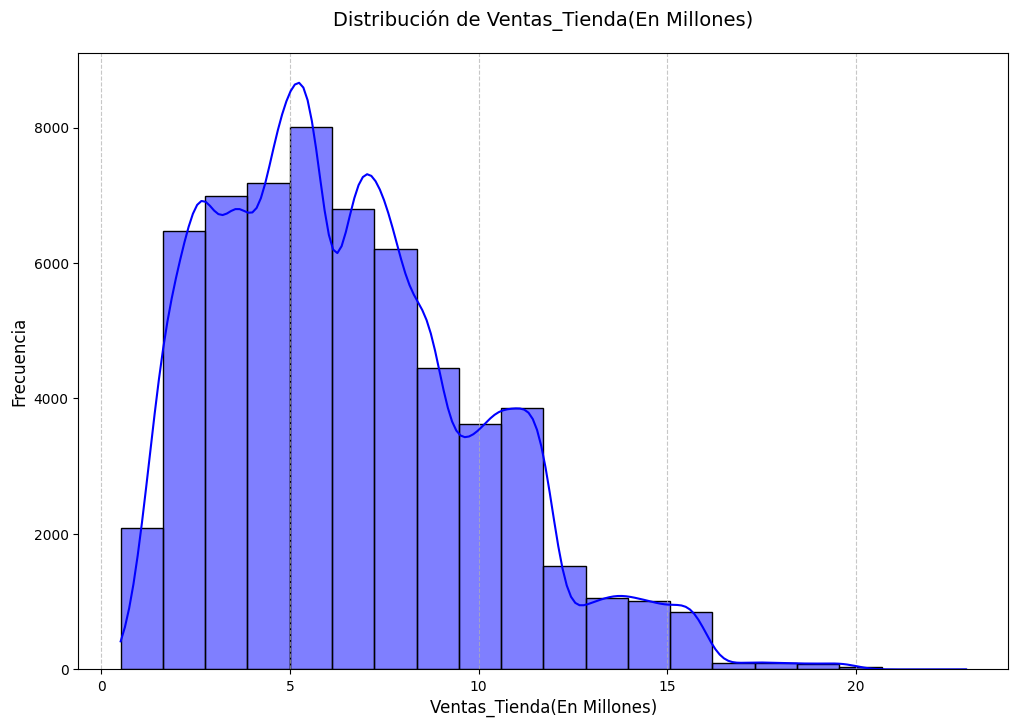

In [ ]:
histogramas(df, "ventas_tienda(en millones)")

**Las ventas se concentran en la mayoria alrededor de 5 a 6 millones de dolares**

### 3.2.2 Ingresos Anuales clientes

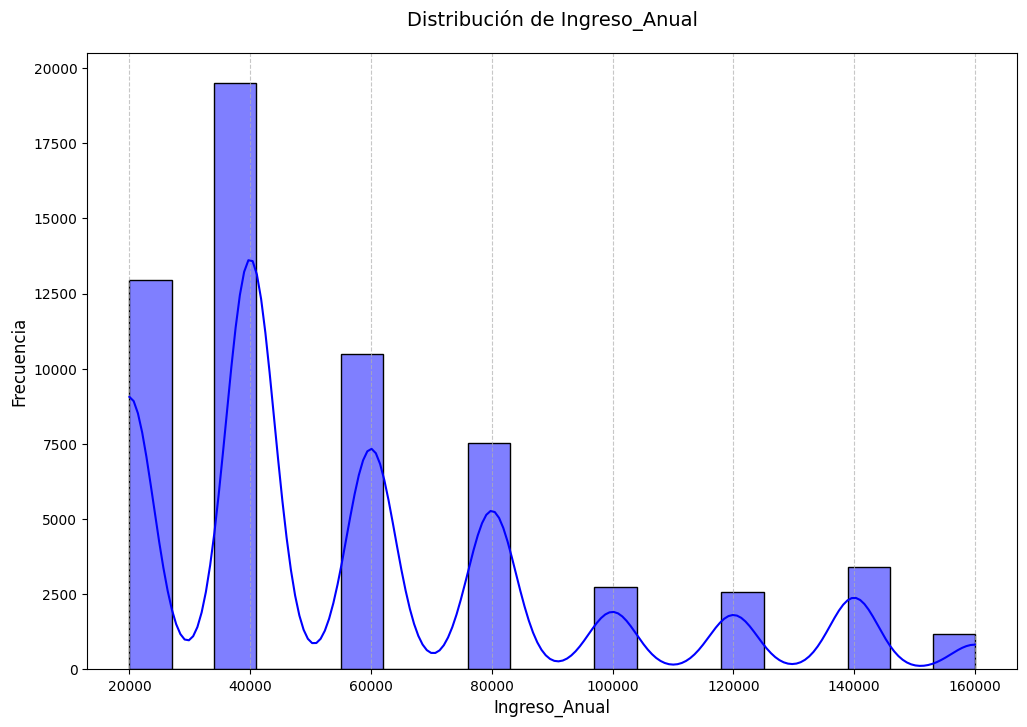

In [ ]:
histogramas(df, "ingreso_anual")

**El gráfico revela una distribución de ingresos anuales típica, con una concentración en niveles bajos y medios, y una disminución de frecuencia a medida que los ingresos aumentan. La posible asimetría positiva sugiere la presencia de algunos individuos con ingresos significativamente altos, la concentrecion se puede deber a diversos factores como edad,escolaridad,etc.**

## 3.3 Boxplots

In [ ]:
def boxplots(df, columna1,columna2):
  plt.figure(figsize=(12, 8))
  sns.boxplot(x=columna1, y=columna2, data=df, palette="pastel",
              hue=columna1,legend=False)
  plt.xlabel(columna1.title(), fontsize=12)
  plt.ylabel(columna2.title(), fontsize=12)
  plt.title(f"{columna1.title()} vs {columna2.title()}", fontsize=14, pad=20)
  plt.grid(True, axis="y", linestyle="--", alpha=0.7)
  plt.xticks(rotation=45)
  plt.show()

### 3.3.1 Ingresos Anuales segun el Estado Civil

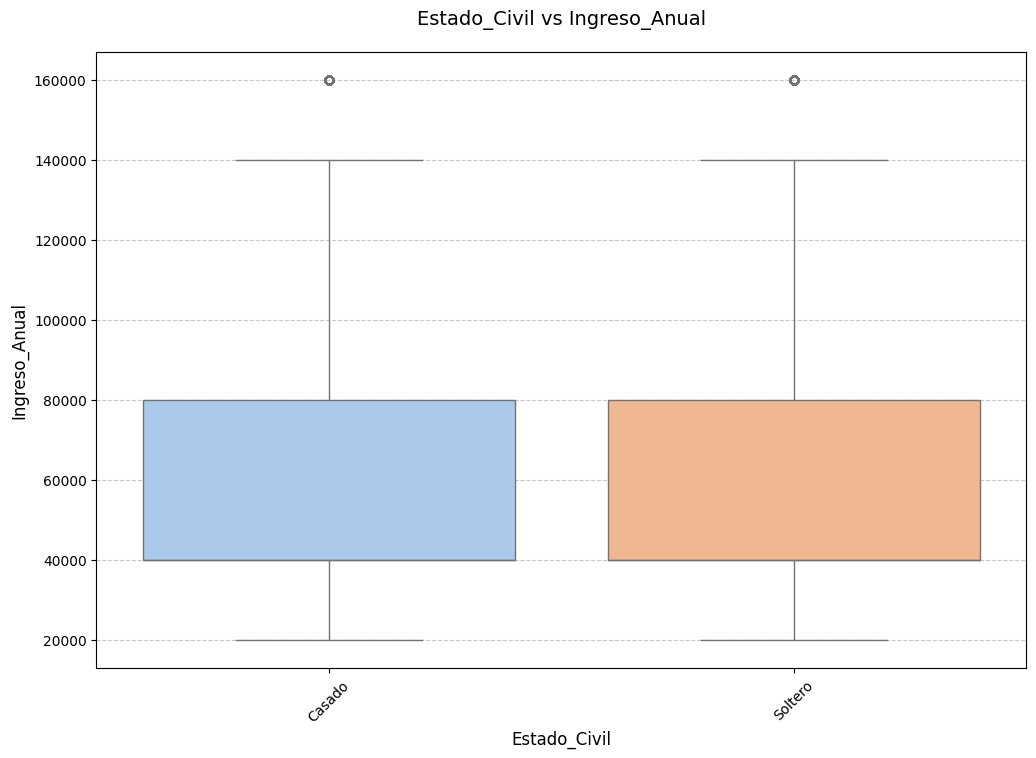

In [ ]:
boxplots(df, "estado_civil", "ingreso_anual")

**El gráfico sugiere que si bien no hay una diferencia sustancial en los ingresos promedio entre casados y solteros, los solteros tienden a tener una mayor dispersión en sus ingresos, lo que implica una mayor diversidad de situaciones económicas individuales.**

In [ ]:
df.head()

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,...,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


### 3.3.2 Comparación De Ventas Según Género

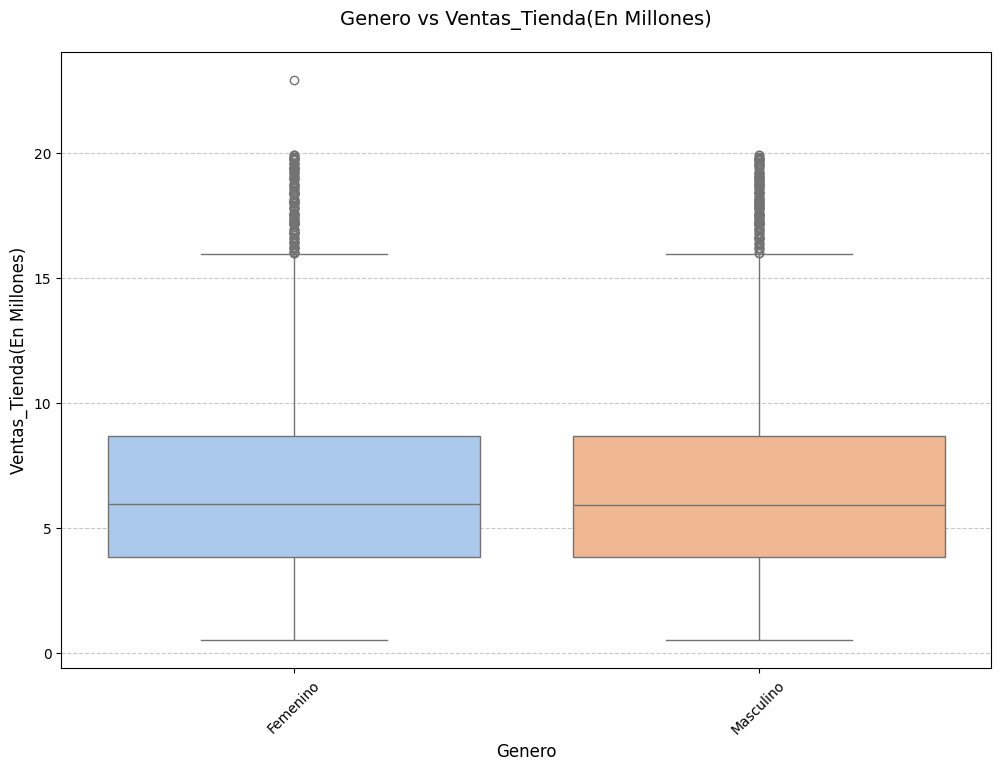

In [ ]:
boxplots(df, "genero", "ventas_tienda(en millones)")

**El gráfico sugiere que si bien no hay una diferencia sustancial en las ventas promedio entre mujeres y hombres, las mujeres tienden a tener una mayor dispersión en sus ventas, lo que implica una mayor diversidad de situaciones económicas individuales. Además, el valor atípico superior en mujeres sugiere la posibilidad de una vendedora con un rendimiento excepcional en ese grupo.**

### 3.3.3 Ingreso Anual Según Nivel De Escolaridad

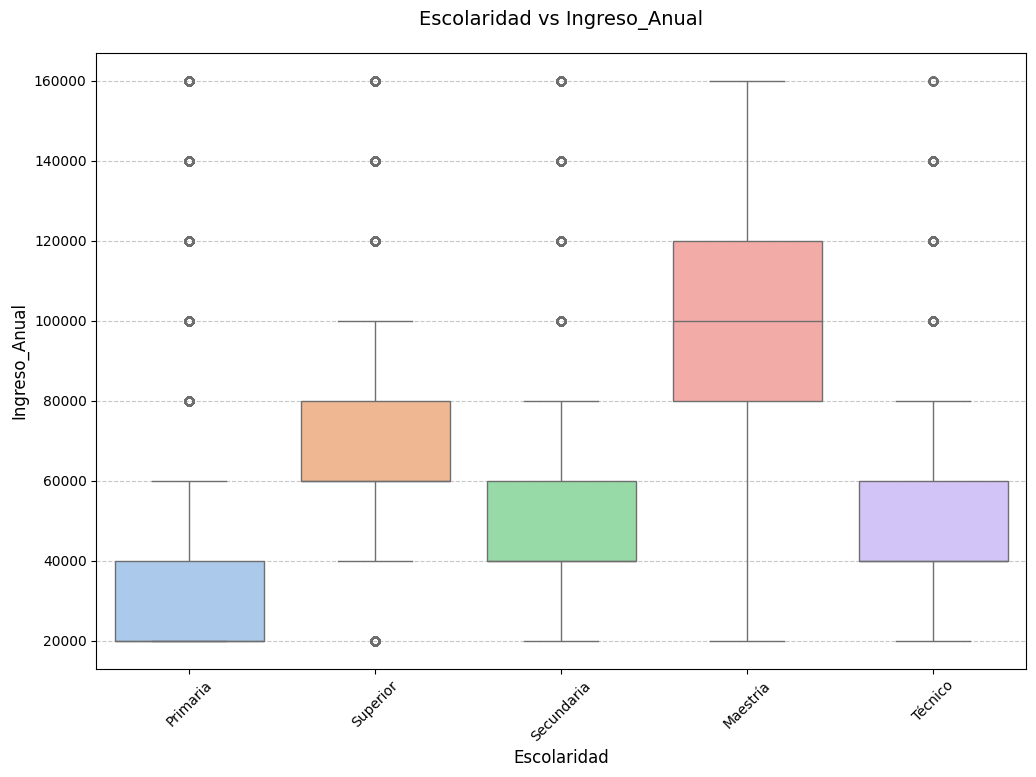

In [ ]:
boxplots(df, "escolaridad", "ingreso_anual")

**El gráfico sugiere que la escolaridad juega un papel importante en la determinación de los ingresos anuales, pero no es el único factor. Otros factores como la experiencia laboral, la ubicación geográfica, la industria y las habilidades individuales también pueden influir en los ingresos.**

## 3.4 Barras doble categoria

In [ ]:
def barras_categoricas(df, columna1, columna2):
  plt.figure(figsize=(14, 8))
  sns.barplot(x=columna1, y=columna2, data=df, palette="viridis",
              hue=columna1, legend=False,errorbar=None)
  plt.xlabel(columna1.title(), fontsize=12)
  plt.ylabel(columna2.title(), fontsize=12)
  plt.title(f"{columna1.title()} vs {columna2.title()}", fontsize=14, pad=20)
  plt.xticks(rotation=90)
  plt.grid(True, axis="y", linestyle="--", alpha=0.7)
  plt.show()

### 3.4.1 Ventas Según La Categoría De Alimentos

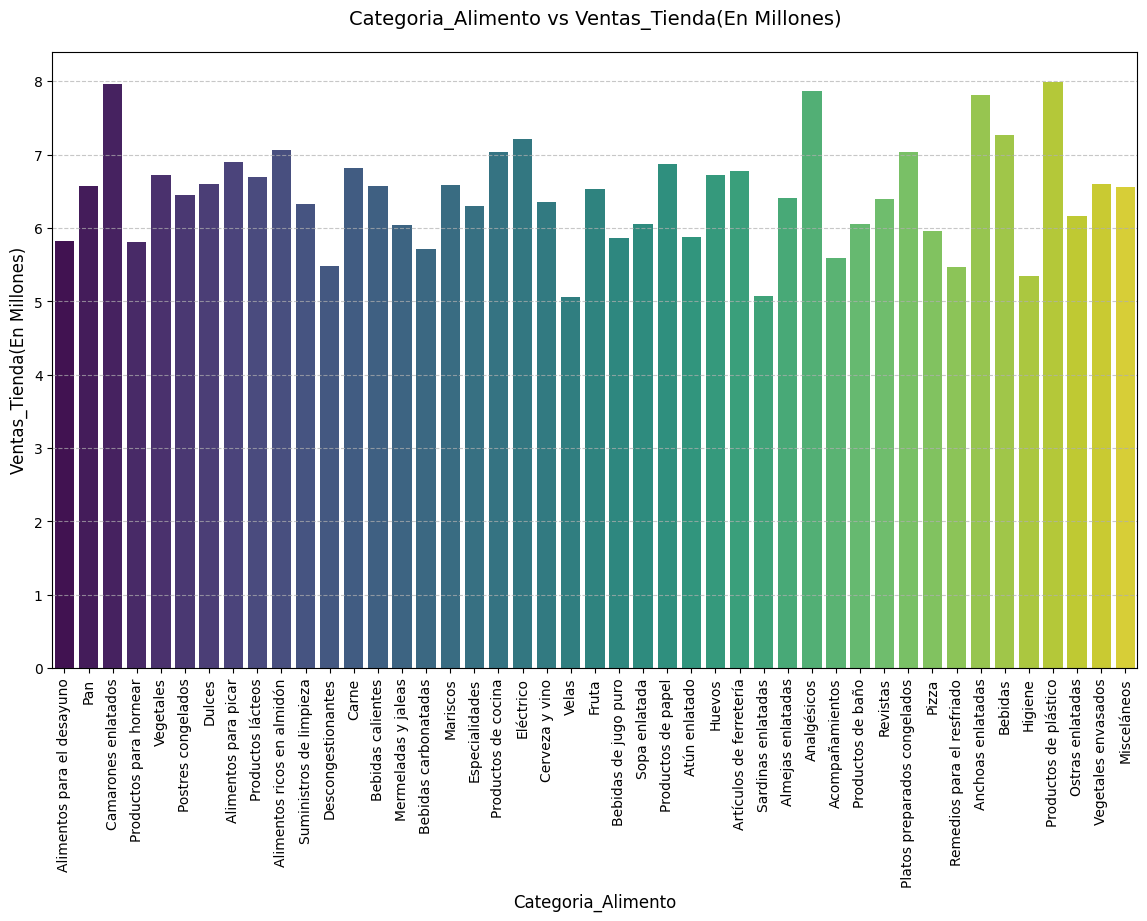

In [ ]:
barras_categoricas(df, "categoria_alimento", "ventas_tienda(en millones)")

**El gráfico revela que las ventas varían significativamente entre las diferentes categorías de alimentos. Algunas categorías, como "Alimentos para el desayuno" y "Productos para hornear", muestran ventas relativamente altas, mientras que otras, como "Anchoas enlatadas" y "Ostras enlatadas", tienen ventas mucho más bajas.**

Esta variación sugiere que la demanda de los consumidores difiere entre los tipos de alimentos. Se puede utilizar esta información para optimizar el inventario, la ubicación de los productos y las estrategias de marketing para cada categoría.

### 3.4.2 Ventas Según La Categoría De Departamento

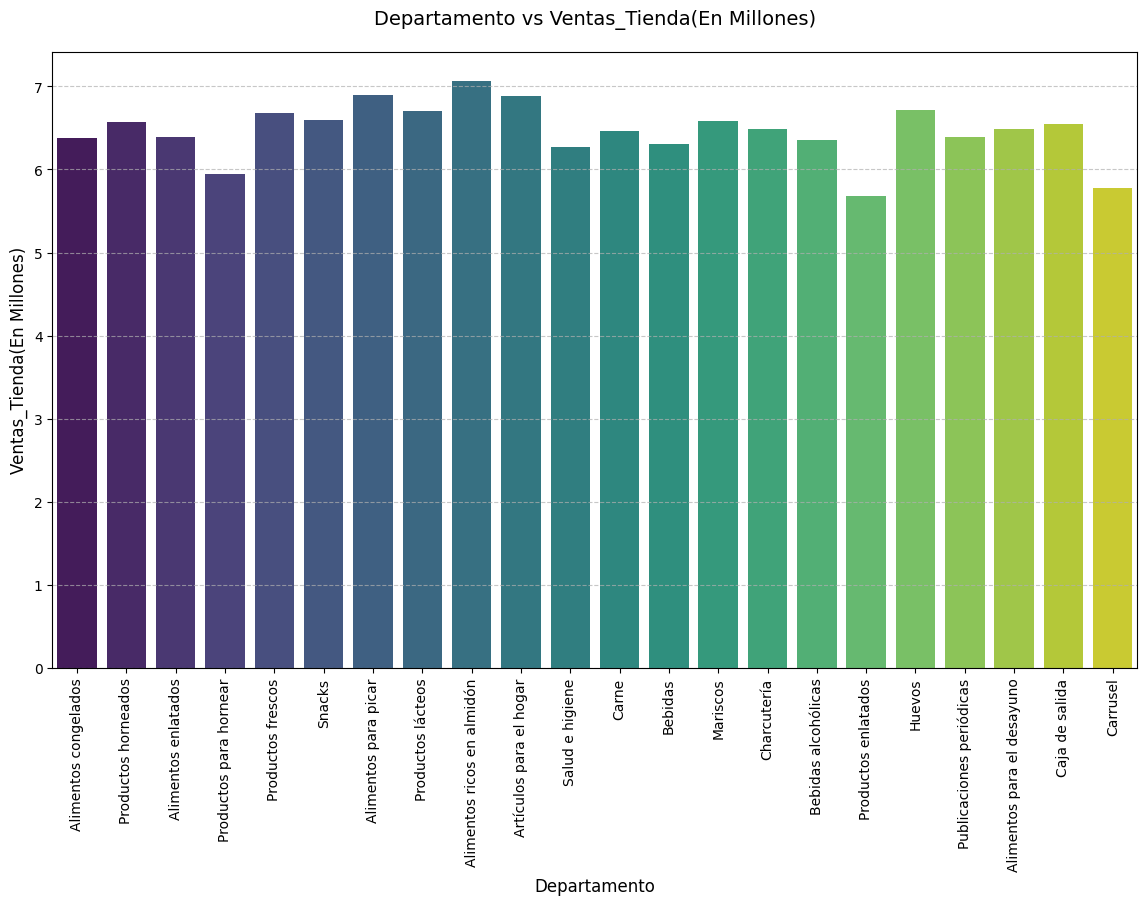

In [ ]:
barras_categoricas(df, "departamento", "ventas_tienda(en millones)")

**El gráfico proporciona una visión general clara de qué departamentos tienen el mejor y el peor rendimiento en términos de ventas, lo que permite  identificar áreas de mejora y oportunidades para aumentar los ingresos.**

### 3.4.3 Tipo de Producto vs. Ventas

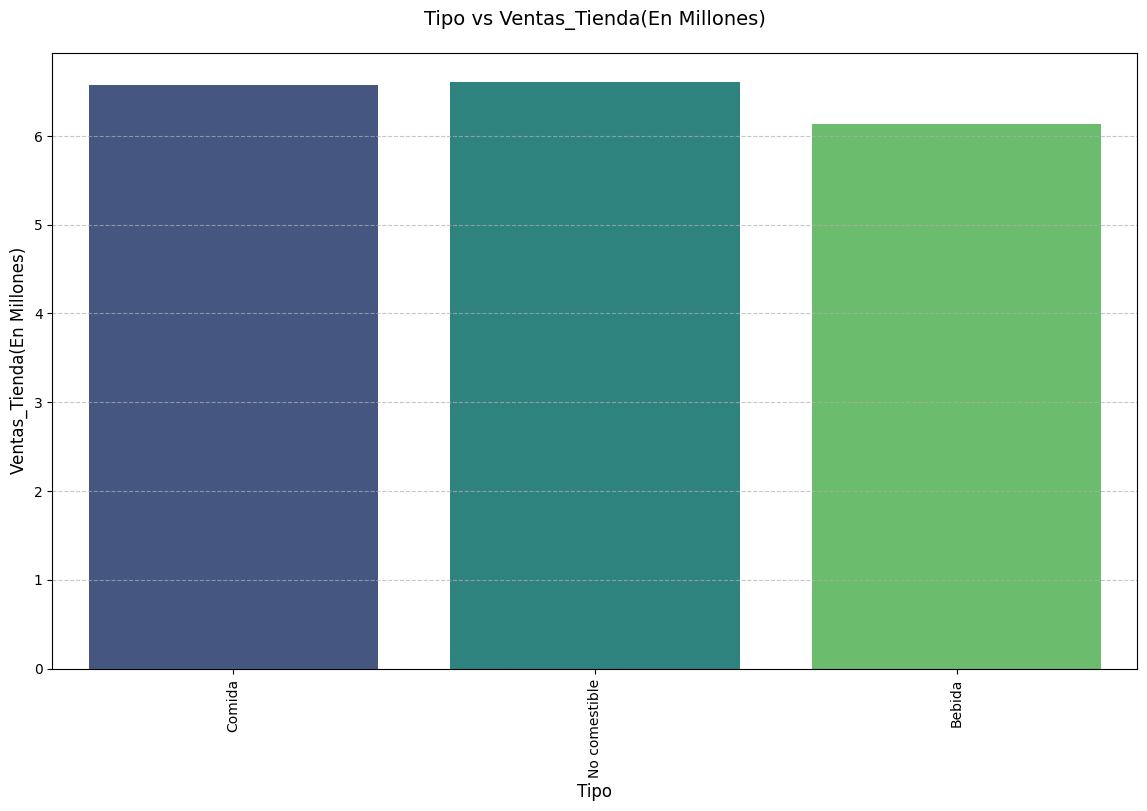

In [ ]:
barras_categoricas(df, "tipo", "ventas_tienda(en millones)")

**El gráfico sugiere que la tienda tiene un rendimiento de ventas bastante equilibrado en las tres categorías principales, con una ligera ventaja para los no comestibles**

## 3.5 Scatterplots

In [ ]:
def scatterplots(df, columna1, columna2):
  plt.figure(figsize=(12, 8))
  sns.scatterplot(x=columna1, y=columna2, data=df, color="purple", alpha=0.7)
  plt.xlabel(columna1.title(), fontsize=12)
  plt.ylabel(columna2.title(), fontsize=12)
  plt.title(f"{columna1.title()} vs {columna2.title()}", fontsize=14, pad=20)
  plt.grid(True, axis="both", linestyle="--", alpha=0.5)
  plt.show()

### 3.5.1 Número de Hijos vs Ingreso Anual

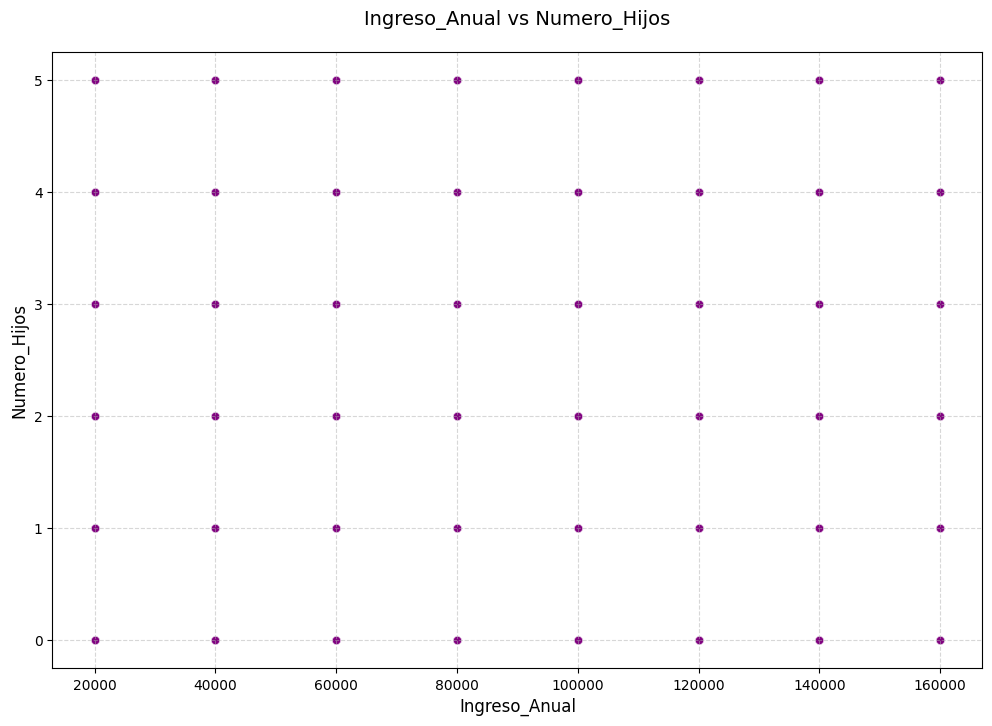

In [ ]:
scatterplots(df, "ingreso_anual", "numero_hijos")

**El gráfico sugiere que no hay una relación lineal simple entre el número de hijos y el ingreso anual. Sin embargo, un análisis más profundo y la consideración de otras variables podrían revelar patrones más complejos.**

## 3.6 Pastel

In [ ]:
def pastel(df, columna):
  plt.figure(figsize=(12, 8))
  df[columna].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "orange"])
  plt.title(f"{columna.title()}", fontsize=14, pad=20)
  plt.ylabel("")
  plt.show()

### 3.6.1 Miembros vs No Miembros

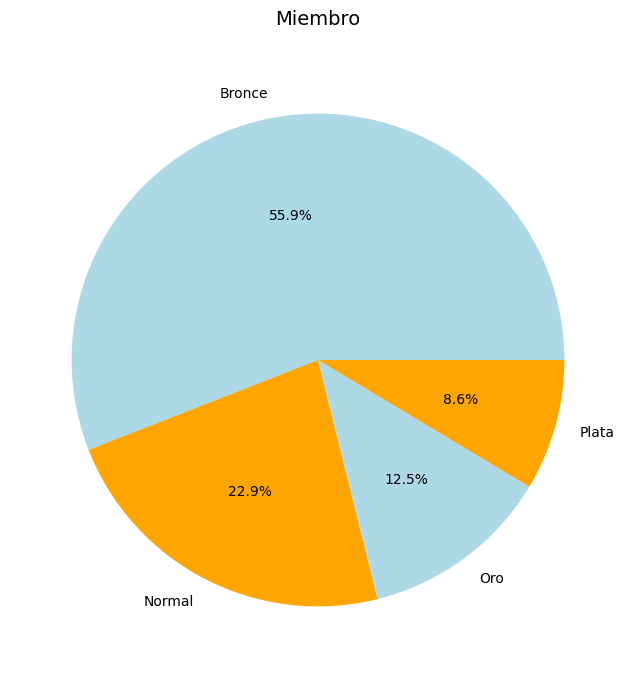

In [ ]:
pastel(df, "miembro")

**El gráfico proporciona una visión clara de la distribución de miembros en los diferentes niveles, resaltando la concentración en el nivel Bronce y la baja representación del nivel Oro. Esta información puede ser útil para comprender mejor a su base de miembros y desarrollar estrategias para aumentar la membresía en los niveles más altos.**

# 4.Preprocesamiento y Obtención de Features

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoria_alimento             60428 non-null  object 
 1   departamento                   60428 non-null  object 
 2   tipo                           60428 non-null  object 
 3   ventas_tienda(en millones)     60428 non-null  float64
 4   costo_tienda(en millones)      60428 non-null  float64
 5   ventas_unitarias(en millones)  60428 non-null  float64
 6   promocion                      60428 non-null  object 
 7   pais                           60428 non-null  object 
 8   estado_civil                   60428 non-null  object 
 9   genero                         60428 non-null  object 
 10  total_de_hijos                 60428 non-null  float64
 11  escolaridad                    60428 non-null  object 
 12  miembro                        60428 non-null 

## 4.1 Eleccion de variables

In [ ]:
variables_elegidas = [
    "categoria_alimento",
    "departamento",
    "tipo",
    "ventas_tienda(en millones)",
    "costo_tienda(en millones)",
    'pais',
    "estado_civil",
    "genero",
    "escolaridad",
    "miembro",
    "ocupacion",
    "ingreso_anual",
    "numero_hijos",
    "pies_cuadrados_tienda",
    "costo"
]

In [ ]:
# Filtrar el dataset con las variables seleccionadas
data_selected = df[variables_elegidas]

In [ ]:
data_selected.head()

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),pais,estado_civil,genero,escolaridad,miembro,ocupacion,ingreso_anual,numero_hijos,pies_cuadrados_tienda,costo
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,Estados Unidos,Casado,Femenino,Primaria,Normal,Técnico,20000.0,1.0,27694.0,126.62
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,Estados Unidos,Casado,Masculino,Superior,Plata,Profesional,60000.0,0.0,27694.0,59.86
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,Estados Unidos,Soltero,Femenino,Primaria,Normal,Obrero,20000.0,0.0,27694.0,84.16
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,Estados Unidos,Casado,Femenino,Secundaria,Bronce,Obrero,40000.0,2.0,27694.0,95.78
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,Estados Unidos,Casado,Masculino,Primaria,Bronce,Técnico,40000.0,0.0,27694.0,50.79


In [ ]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   categoria_alimento          60428 non-null  object 
 1   departamento                60428 non-null  object 
 2   tipo                        60428 non-null  object 
 3   ventas_tienda(en millones)  60428 non-null  float64
 4   costo_tienda(en millones)   60428 non-null  float64
 5   pais                        60428 non-null  object 
 6   estado_civil                60428 non-null  object 
 7   genero                      60428 non-null  object 
 8   escolaridad                 60428 non-null  object 
 9   miembro                     60428 non-null  object 
 10  ocupacion                   60428 non-null  object 
 11  ingreso_anual               60428 non-null  float64
 12  numero_hijos                60428 non-null  float64
 13  pies_cuadrados_tienda       604

## 4.2 Label Encoding(categorias con orden)

In [ ]:
# 1. Codificación de escolaridad y miembro (Label Encoding por orden lógico)
educacion_orden = {
    "Primaria": 1,
    "Secundaria": 2,
    "Técnico": 3,
    "Superior": 4,
    "Maestría": 5
}

miembro_orden = {
    "Normal": 1,
    "Bronce": 2,
    "Plata": 3,
    "Oro": 4
}

# Usar .loc[:, "columna"] para modificar sin advertencias
data_selected.loc[:, "escolaridad"] = data_selected["escolaridad"].map(educacion_orden)
data_selected.loc[:, "miembro"] = data_selected["miembro"].map(miembro_orden)


## 4.3 One-Hot Encoding (sin orden especifico)

In [ ]:
# One-Hot Encoding a las variables categóricas sin orden específico
from sklearn.preprocessing import OneHotEncoder
categorical_columns = ["categoria_alimento", "departamento", "tipo", "pais", "estado_civil",
                        "genero","ocupacion"]

# Aplicar One-Hot Encoding con One-Hot Encoder
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded_data = encoder.fit_transform(data_selected[categorical_columns])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

In [ ]:
encoded_df.head()

,categoria_alimento_Alimentos para el desayuno,categoria_alimento_Alimentos para picar,categoria_alimento_Alimentos ricos en almidón,categoria_alimento_Almejas enlatadas,categoria_alimento_Analgésicos,categoria_alimento_Anchoas enlatadas,categoria_alimento_Artículos de ferretería,categoria_alimento_Atún enlatado,categoria_alimento_Bebidas,categoria_alimento_Bebidas calientes,...,tipo_Comida,tipo_No comestible,pais_Estados Unidos,pais_México,estado_civil_Soltero,genero_Masculino,ocupacion_Gestión,ocupacion_Obrero,ocupacion_Profesional,ocupacion_Técnico
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## 4.4 Estandarizacion de datos numericos

In [ ]:
# Estandarización de datos numéricos
from sklearn.preprocessing import StandardScaler

# Crear un objeto StandardScaler y concatear el dataframe
scaler = StandardScaler()

numeric_columns = ["ventas_tienda(en millones)","costo_tienda(en millones)", "ingreso_anual", "numero_hijos","pies_cuadrados_tienda","costo",
                   "escolaridad","miembro"]
df_final = pd.concat([encoded_df, data_selected[numeric_columns]], axis=1)

### Creacion de X_std

In [ ]:
X_std = scaler.fit_transform(df_final)
df_standarizado = pd.DataFrame(X_std, columns=df_final.columns)
df_standarizado.head()

,categoria_alimento_Alimentos para el desayuno,categoria_alimento_Alimentos para picar,categoria_alimento_Alimentos ricos en almidón,categoria_alimento_Almejas enlatadas,categoria_alimento_Analgésicos,categoria_alimento_Anchoas enlatadas,categoria_alimento_Artículos de ferretería,categoria_alimento_Atún enlatado,categoria_alimento_Bebidas,categoria_alimento_Bebidas calientes,...,ocupacion_Profesional,ocupacion_Técnico,ventas_tienda(en millones),costo_tienda(en millones),ingreso_anual,numero_hijos,pies_cuadrados_tienda,costo,escolaridad,miembro
0,5.482008,-0.359591,-0.136354,-0.057481,-0.117867,-0.059475,-0.098015,-0.081115,-0.09853,-0.122333,...,-0.701121,1.666713,0.236490,0.071398,-1.061471,0.130925,-0.051654,0.911587,-1.130886,-1.233933
1,5.482008,-0.359591,-0.136354,-0.057481,-0.117867,-0.059475,-0.098015,-0.081115,-0.09853,-0.122333,...,1.426287,-0.599983,-0.294838,-0.017247,0.046757,-0.636291,-0.051654,-1.312930,1.176971,0.996155
2,5.482008,-0.359591,-0.136354,-0.057481,-0.117867,-0.059475,-0.098015,-0.081115,-0.09853,-0.122333,...,-0.701121,-0.599983,-0.826167,-0.865700,-1.061471,-0.636291,-0.051654,-0.503228,-1.130886,-1.233933
3,5.482008,-0.359591,-0.136354,-0.057481,-0.117867,-0.059475,-0.098015,-0.081115,-0.09853,-0.122333,...,-0.701121,-0.599983,-0.826167,-0.992335,-0.507357,0.898141,-0.051654,-0.116036,-0.361600,-0.118889
4,5.482008,-0.359591,-0.136354,-0.057481,-0.117867,-0.059475,-0.098015,-0.081115,-0.09853,-0.122333,...,-0.701121,1.666713,-0.710661,-0.820002,-0.507357,-0.636291,-0.051654,-1.615153,-1.130886,-0.118889


### X_std con un escalado mas Robusto

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
X_scaled = scaler.fit_transform(df_final)

# 5.Clusterización y validación

## 5.1 Clusterización

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Aplicar PCA para reducir la dimensionalidad antes de la clusterización con KMeans
pca_kmeans = PCA(n_components=2)
X_pca_kmeans = pca_kmeans.fit_transform(X_std) #X_std estandar X_scaled robusto

# Metodo del Codo(Elbow Method) y Silhouette Score para determinar el número óptimo de clusters
rango_clusters = range(2, 11)
inercia_pca = []
scores_silhouette_pca = []

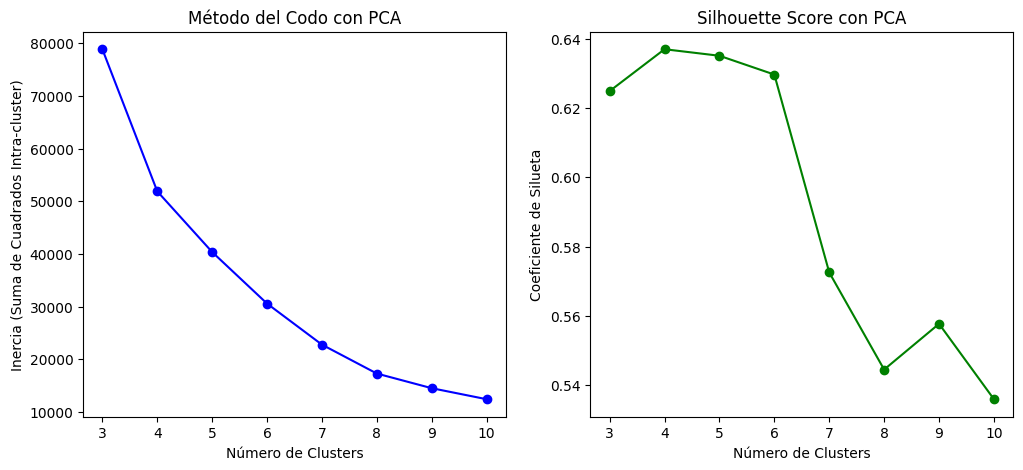

In [ ]:
# Calcular métricas para cada número de clusters en el rango
for k in range(3,11):
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_pca.fit(X_pca_kmeans)

    inercia_pca.append(kmeans_pca.inertia_)  # Guardar la inercia
    scores_silhouette_pca.append(silhouette_score(X_pca_kmeans, kmeans_pca.labels_))  # Silhouette Score

# Graficar los resultados
plt.figure(figsize=(12, 5))

# Gráfico del Método del Codo (Elbow Method)
plt.subplot(1, 2, 1)
plt.plot(range(3,11), inercia_pca, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia (Suma de Cuadrados Intra-cluster)')
plt.title('Método del Codo con PCA')

# Gráfico del Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range(3,11), scores_silhouette_pca, marker='o', linestyle='-', color='g')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta')
plt.title('Silhouette Score con PCA')

plt.show()

## 5.2 Validacion

### 5.2.1 Numero de Clusters

In [ ]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Probar KMeans con 4 y 5 clusters segun la grafica
rango_clusters = range(3, 11)
comparison_results = {
    "Número de Clusters": [],
    "Silhouette Score": [],
    "Davies-Bouldin Score": [],
    "Calinski-Harabasz Score": []
}

for k in rango_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca_kmeans)

    silhouette = silhouette_score(X_pca_kmeans, labels)
    davies_bouldin = davies_bouldin_score(X_pca_kmeans, labels)
    calinski_harabasz = calinski_harabasz_score(X_pca_kmeans, labels)

    comparison_results["Número de Clusters"].append(k)
    comparison_results["Silhouette Score"].append(silhouette)
    comparison_results["Davies-Bouldin Score"].append(davies_bouldin)
    comparison_results["Calinski-Harabasz Score"].append(calinski_harabasz)

# Convertir resultados en un DataFrame y mostrar
df_comparison = pd.DataFrame(comparison_results)
df_comparison

,Número de Clusters,Silhouette Score,Davies-Bouldin Score,Calinski-Harabasz Score
0,3,0.624888,0.505353,123665.856106
1,4,0.636980,0.452814,135763.006493
2,5,0.635091,0.528387,135182.812201
3,6,0.629664,0.544250,146605.530443
4,7,0.572534,0.571180,167401.866582
5,8,0.544487,0.562485,191691.160818
6,9,0.557694,0.532901,201255.606643
7,10,0.535925,0.576056,210085.894647


**Segun la comparacion la mejor forma sera trabajar con 4 o 5 clusters esto se puede ver reflejado en las graficas anteriores**

### 5.2.2 Estructura

In [ ]:
# Generar datos aleatorios con la misma estructura que X_pca_kmeans filas y columnas
random_data = np.random.rand(*X_pca_kmeans.shape)

# Aplicar KMeans con 5 clusters a los datos aleatorios
kmeans_random = KMeans(n_clusters=5, random_state=42, n_init=50, max_iter=500,init='k-means++')
labels_random = kmeans_random.fit_predict(random_data)

# Calcular métricas para los datos aleatorios
silhouette_random = silhouette_score(random_data, labels_random)
davies_bouldin_random = davies_bouldin_score(random_data, labels_random)
calinski_harabasz_random = calinski_harabasz_score(random_data, labels_random)

# Guardar los resultados en un DataFrame
random_comparison = {
    "Dataset": ["X_pca_kmeans", "random_data"],
    "Silhouette Score": [0.635091, silhouette_random],
    "Davies-Bouldin Score": [0.528387, davies_bouldin_random],
    "Calinski-Harabasz Score": [135182.812201, calinski_harabasz_random]
}

df_random_comparison = pd.DataFrame(random_comparison)
df_random_comparison

,Dataset,Silhouette Score,Davies-Bouldin Score,Calinski-Harabasz Score
0,X_pca_kmeans,0.635091,0.528387,135182.812201
1,random_data,0.390514,0.839465,56603.615304


### 5.2.3 Estabilidad


In [ ]:
# Dividir X_pca_kmeans en 5 partes iguales
split_sets = np.array_split(X_pca_kmeans, 5)

# Almacenar métricas para cada subconjunto
stability_results = {
    "Subset": [],
    "Silhouette Score": [],
    "Davies-Bouldin Score": [],
    "Calinski-Harabasz Score": []
}

# Evaluar estabilidad en cada subconjunto
for i, subset in enumerate(split_sets):
    # Se genero ajuste de hiperparametros
    kmeans_subset = KMeans(n_clusters=5, random_state=42, n_init=50, max_iter=500,init='k-means++')
    labels_subset = kmeans_subset.fit_predict(subset)

    silhouette_subset = silhouette_score(subset, labels_subset)

    davies_bouldin_subset = davies_bouldin_score(subset, labels_subset)
    calinski_harabasz_subset = calinski_harabasz_score(subset, labels_subset)

    stability_results["Subset"].append(f"Set_{i+1}")
    stability_results["Silhouette Score"].append(silhouette_subset)
    stability_results["Davies-Bouldin Score"].append(davies_bouldin_subset)
    stability_results["Calinski-Harabasz Score"].append(calinski_harabasz_subset)

# Convertir en DataFrame y mostrar
df_stability = pd.DataFrame(stability_results)
df_stability


,Subset,Silhouette Score,Davies-Bouldin Score,Calinski-Harabasz Score
0,Set_1,0.526570,0.608843,64530.235749
1,Set_2,0.564479,0.645969,17962.909280
2,Set_3,0.673853,0.659520,28524.971005
3,Set_4,0.544488,0.600698,31657.657189
4,Set_5,0.656314,0.517088,36617.050432


## 5.3 Instanciando el cluster

### 5.3.1 Instanciar

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

variables_elegidas = [
    "categoria_alimento",
    "departamento",
    "tipo",
    "ventas_tienda(en millones)",
    "costo_tienda(en millones)",
    'pais',
    "estado_civil",
    "genero",
    "escolaridad",
    "miembro",
    "ocupacion",
    "ingreso_anual",
    "numero_hijos",
    "pies_cuadrados_tienda",
    "costo"
]

df_filtrado = df[variables_elegidas]

# Aplicar PCA para reducir la dimensionalidad antes de la clusterización con KMeans
pca_kmeans = PCA(n_components=2)  # Reducimos a 2 dimensiones
X_pca_kmeans = pca_kmeans.fit_transform(X_std) #Se definio X_std anteriormente

# Instanciar KMeans con 4 clusters (configuración escogida anteriormente)
kmeans_final = KMeans(n_clusters=5, random_state=42, n_init=50, max_iter=500,init='k-means++')

# Ajustar el modelo con el conjunto de datos X_pca_kmeans
kmeans_final.fit(X_pca_kmeans)

# Almacenar los labels (clusters) en el DataFrame filtrado
df_filtrado['cluster'] = kmeans_final.labels_

df_filtrado.head()

<ipython-input-55-4413b13498cc>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['cluster'] = kmeans_final.labels_


,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),pais,estado_civil,genero,escolaridad,miembro,ocupacion,ingreso_anual,numero_hijos,pies_cuadrados_tienda,costo,cluster
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,Estados Unidos,Casado,Femenino,Primaria,Normal,Técnico,20000.0,1.0,27694.0,126.62,2
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,Estados Unidos,Casado,Masculino,Superior,Plata,Profesional,60000.0,0.0,27694.0,59.86,0
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,Estados Unidos,Soltero,Femenino,Primaria,Normal,Obrero,20000.0,0.0,27694.0,84.16,2
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,Estados Unidos,Casado,Femenino,Secundaria,Bronce,Obrero,40000.0,2.0,27694.0,95.78,2
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,Estados Unidos,Casado,Masculino,Primaria,Bronce,Técnico,40000.0,0.0,27694.0,50.79,2


### 5.3.2 Visualizaciones scatters de clusters

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def scatter_clusters(df, x, y):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=x, y=y, hue='cluster', data=df,palette='Set1')
    plt.xlabel(x.title(), fontsize=12)
    plt.ylabel(y.title(), fontsize=12)
    plt.title(f"Clusters en {x} vs {y}", fontsize=14, pad=20)
    plt.grid(True, axis="both", linestyle="--", alpha=0.5)
    plt.legend(title="Cluster")
    plt.show()

In [ ]:
df_filtrado.head()

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),pais,estado_civil,genero,escolaridad,miembro,ocupacion,ingreso_anual,numero_hijos,pies_cuadrados_tienda,costo,cluster
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,Estados Unidos,Casado,Femenino,Primaria,Normal,Técnico,20000.0,1.0,27694.0,126.62,2
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,Estados Unidos,Casado,Masculino,Superior,Plata,Profesional,60000.0,0.0,27694.0,59.86,0
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,Estados Unidos,Soltero,Femenino,Primaria,Normal,Obrero,20000.0,0.0,27694.0,84.16,2
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,Estados Unidos,Casado,Femenino,Secundaria,Bronce,Obrero,40000.0,2.0,27694.0,95.78,2
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,Estados Unidos,Casado,Masculino,Primaria,Bronce,Técnico,40000.0,0.0,27694.0,50.79,2


#### Ventas y Costo de Tienda por Cluster

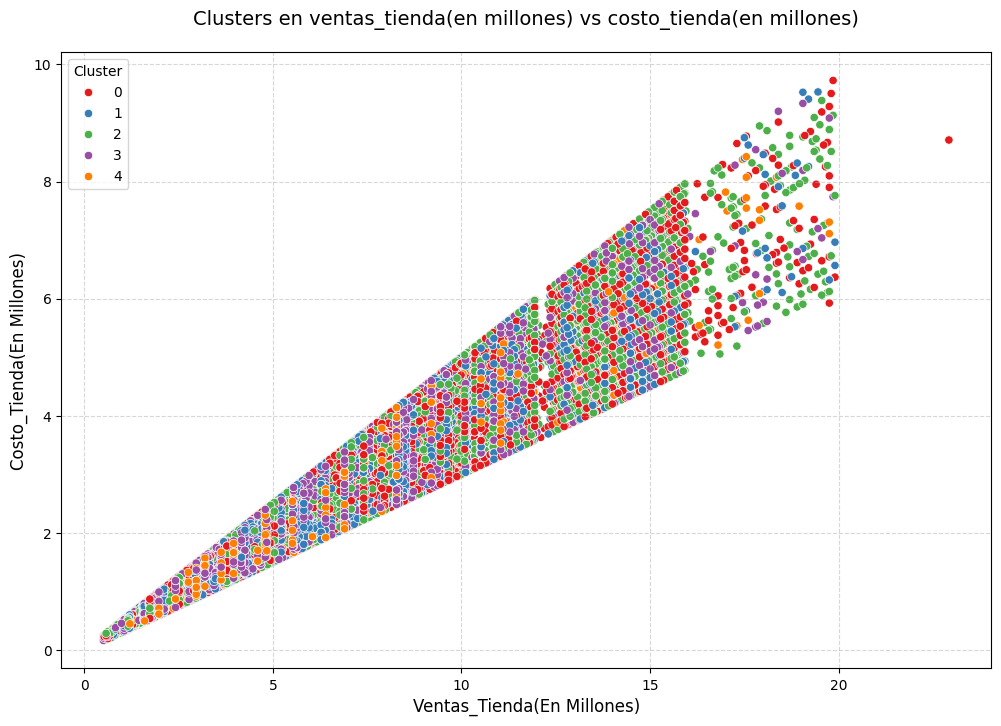

In [ ]:
scatter_clusters(df_filtrado, "ventas_tienda(en millones)", "costo_tienda(en millones)")

**Los clusters o grupos de puntos de colores indican diferentes niveles de ventas y costos. Los puntos más cercanos al origen (esquina inferior izquierda) representan tiendas con ventas y costos más bajos, mientras que los puntos más alejados del origen (esquina superior derecha) muestran tiendas con ventas y costos más altos.**

**El gráfico sugiere que no hay tiendas con ventas altas y costos bajos, lo cual refuerza la idea de la relación proporcional entre ambas variables. Las tiendas con mayores ventas incurren en mayores costos para mantener ese nivel de ventas.**

#### Numero de Hijos vs Ingreso anual

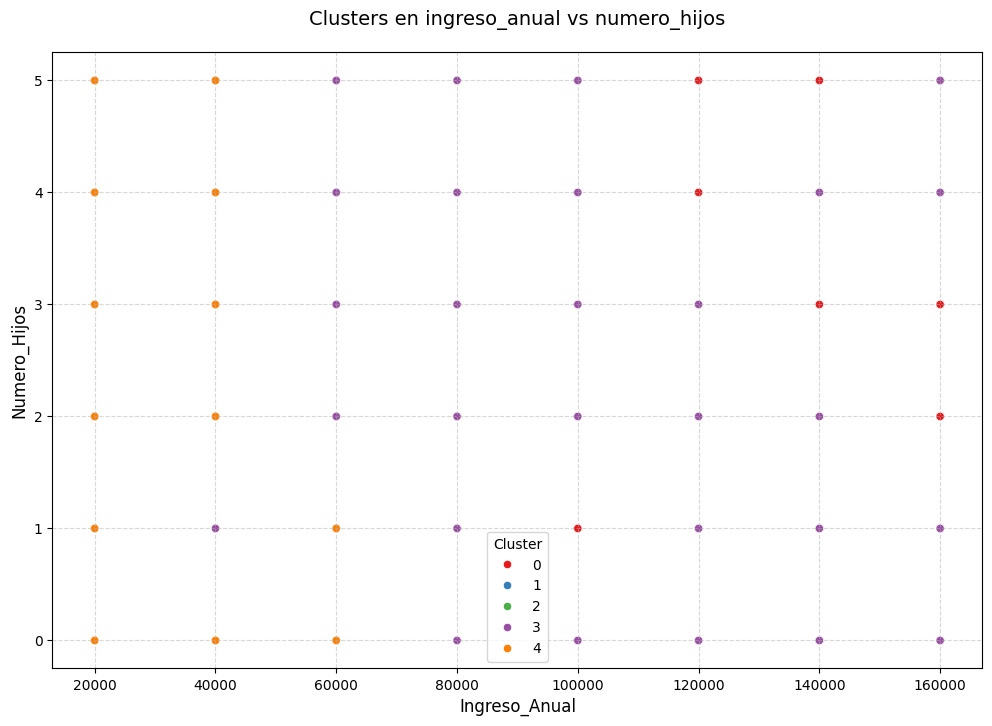

In [ ]:
scatter_clusters(df_filtrado, "ingreso_anual", "numero_hijos")

**El gráfico sugiere que el ingreso anual y el número de hijos son variables independientes entre sí en la muestra analizada. No se observa una correlación que permita predecir el número de hijos en función del ingreso, o viceversa. La dispersión de los clusters indica que otros factores no incluidos en este análisis son determinantes para entender la relación entre estas variables.**

### 5.3.3 Distribucion de categorias por clusters

In [ ]:
def distribuciones_clusters(df,x):
  plt.figure(figsize=(16, 8))
  sns.countplot(x=x, hue='cluster', data=df, palette='Set1')
  plt.xlabel(x.title(), fontsize=12)
  plt.ylabel("Frecuencia", fontsize=12)
  plt.title(f"Distribución de {x} por Cluster", fontsize=14, pad=20)
  plt.xticks(rotation=90)
  plt.grid(True, axis="y", linestyle="--", alpha=0.7)
  plt.legend(title="Cluster")
  plt.show()

#### Categoria de Alimento por Cluster

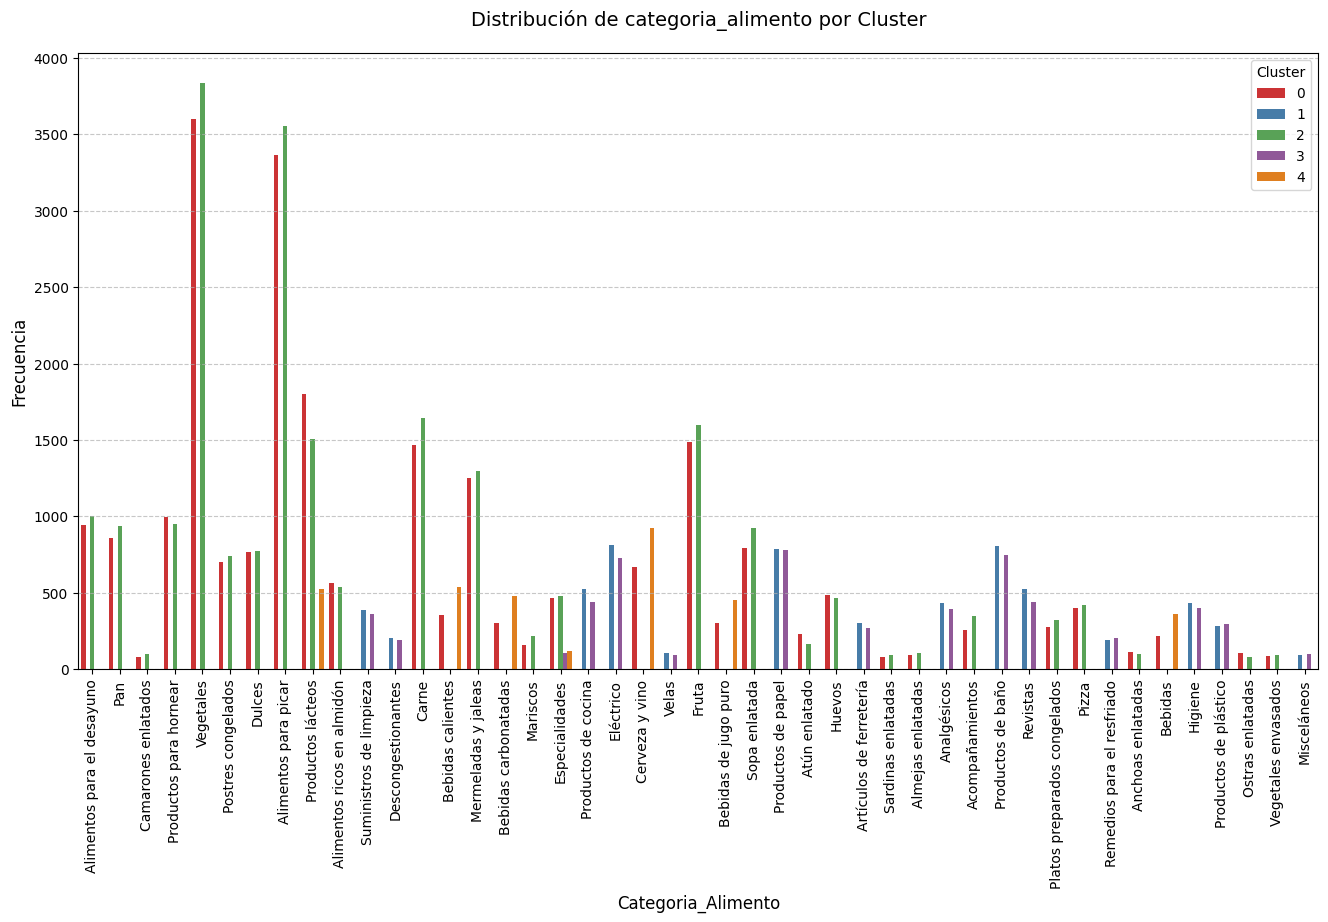

In [ ]:
distribuciones_clusters(df_filtrado, "categoria_alimento")

* Dominancia de Categorías: Algunas categorías de alimentos muestran una mayor concentración en ciertos clusters. Por ejemplo, el "Pan" parece ser más popular en el cluster 0, mientras que los "Vegetales" tienen una mayor presencia en el cluster 2.

* Clusters Especializados: Algunos clusters parecen estar más especializados en ciertas categorías de alimentos. Por ejemplo, el cluster 4 muestra una mayor proporción de "Productos de cocina" y "Eléctrico", lo que sugiere que este cluster podría representar a consumidores interesados en la preparación de alimentos en el hogar.

* **En resumen, el gráfico revela patrones distintos en las preferencias alimentarias de los diferentes clusters. Cada cluster parece representar un segmento de consumidores con necesidades y deseos específicos. Esta información se puede utilizar para segmentar el mercado, personalizar ofertas y mejorar la experiencia del cliente.**

#### Distribucion de departamento por cluster

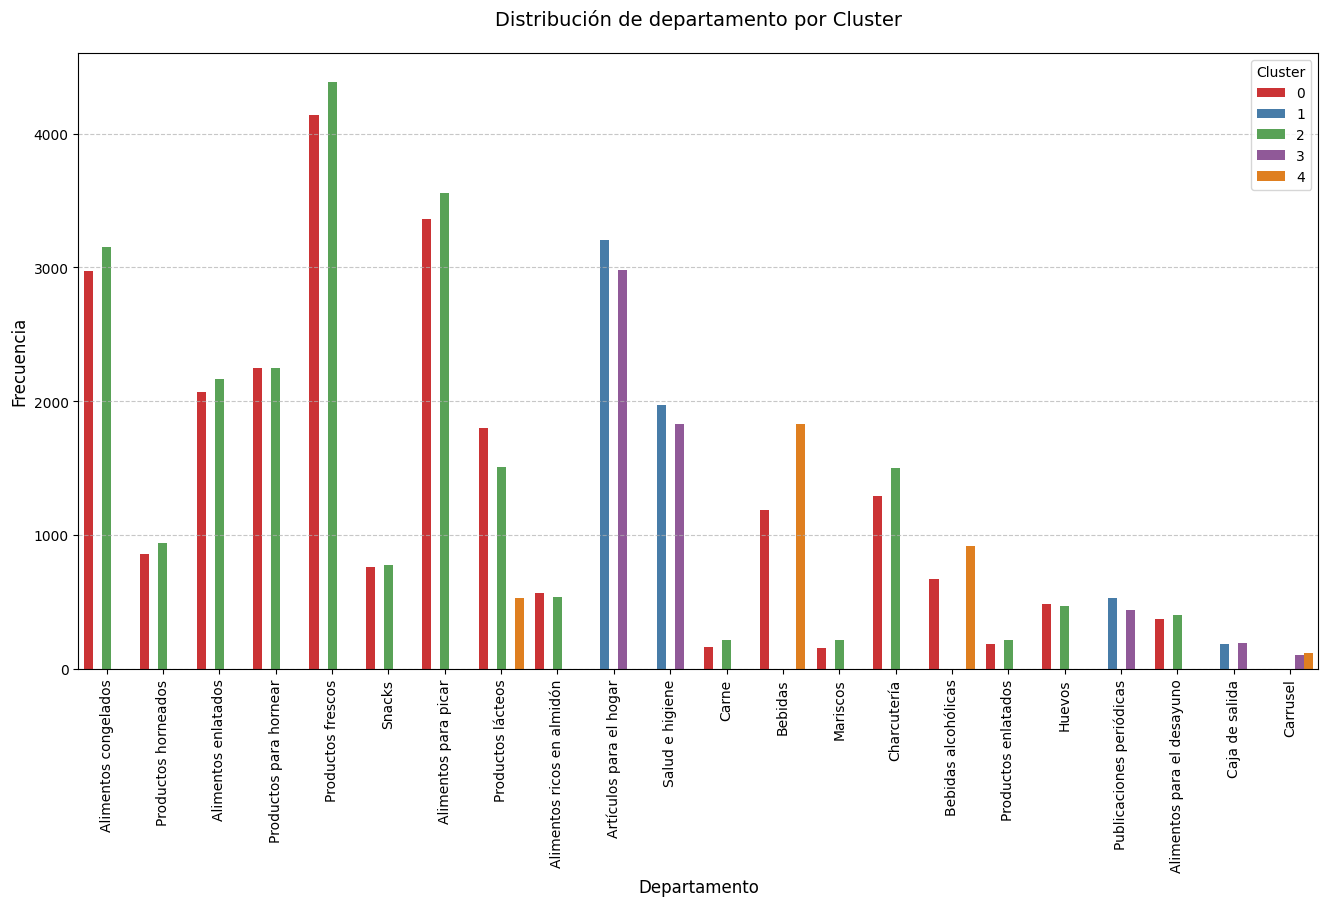

In [ ]:
distribuciones_clusters(df_filtrado, "departamento")

* Preferencias de Departamento: Cada cluster muestra preferencias distintas por ciertos departamentos. Por ejemplo, el cluster 0 muestra una alta frecuencia en "Alimentos congelados" y "Productos horneados", mientras que el cluster 2 prefiere "Artículos para el hogar" y "Salud e higiene".

* Clusters Especializados: Algunos clusters parecen estar más especializados en ciertos tipos de productos. El cluster 4, por ejemplo, muestra una alta concentración en "Bebidas", lo que sugiere que este cluster podría representar a consumidores con una fuerte preferencia por este tipo de alimentos.

* Patrones de Compra: Los patrones de compra varían significativamente entre los clusters. Esto sugiere que cada cluster representa un segmento de consumidores con necesidades y preferencias específicas.

* **En resumen, el gráfico revela patrones distintos en las preferencias de departamento de los diferentes clusters. Cada cluster parece representar un segmento de consumidores con necesidades y deseos específicos. Esta información se puede utilizar para segmentar el mercado, personalizar ofertas y mejorar la experiencia del cliente.**

#### Distribucion del estado civil

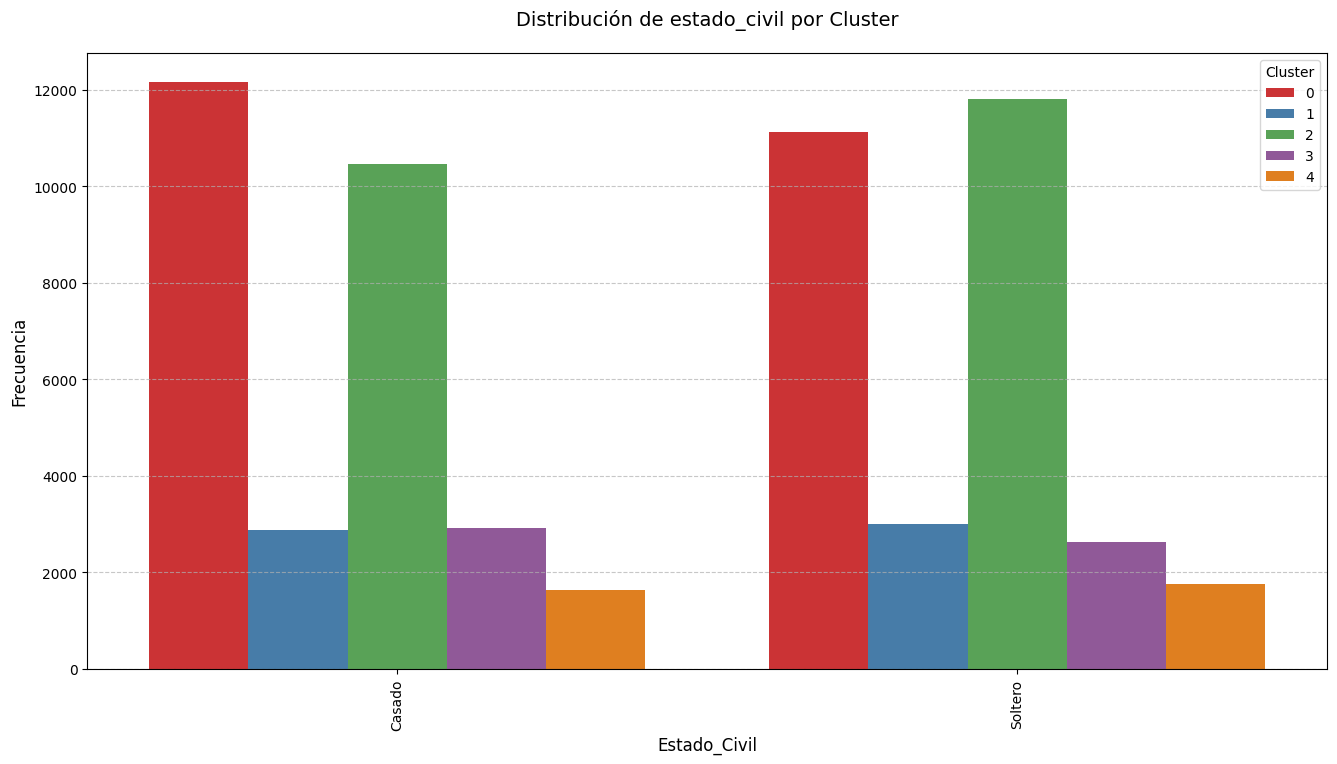

In [ ]:
distribuciones_clusters(df_filtrado, "estado_civil")

* Clusters Homogéneos: Los clusters tienden a ser bastante homogéneos en cuanto al estado civil. Es decir, la mayoría de los clusters muestran una clara preferencia por uno de los dos estados civiles.

* Dominancia de "Casado" y "Soltero": Hay clusters donde predomina abrumadoramente el estado civil "Casado" y otros donde el estado civil "Soltero" es el más frecuente.

* Posible Segmentación: La información del estado civil puede ser valiosa para segmentar mercados y entender mejor los perfiles de los consumidores. Esto permite adaptar productos, servicios y mensajes de marketing a las necesidades y características de cada grupo.

* **En resumen, el gráfico revela una clara diferenciación en la distribución del estado civil entre los clusters. Cada cluster parece representar un segmento de la población con características demográficas distintas. Esta información se puede utilizar para segmentar el mercado, personalizar ofertas y mejorar la experiencia del cliente.**

#### Distribucion de la escolaridad

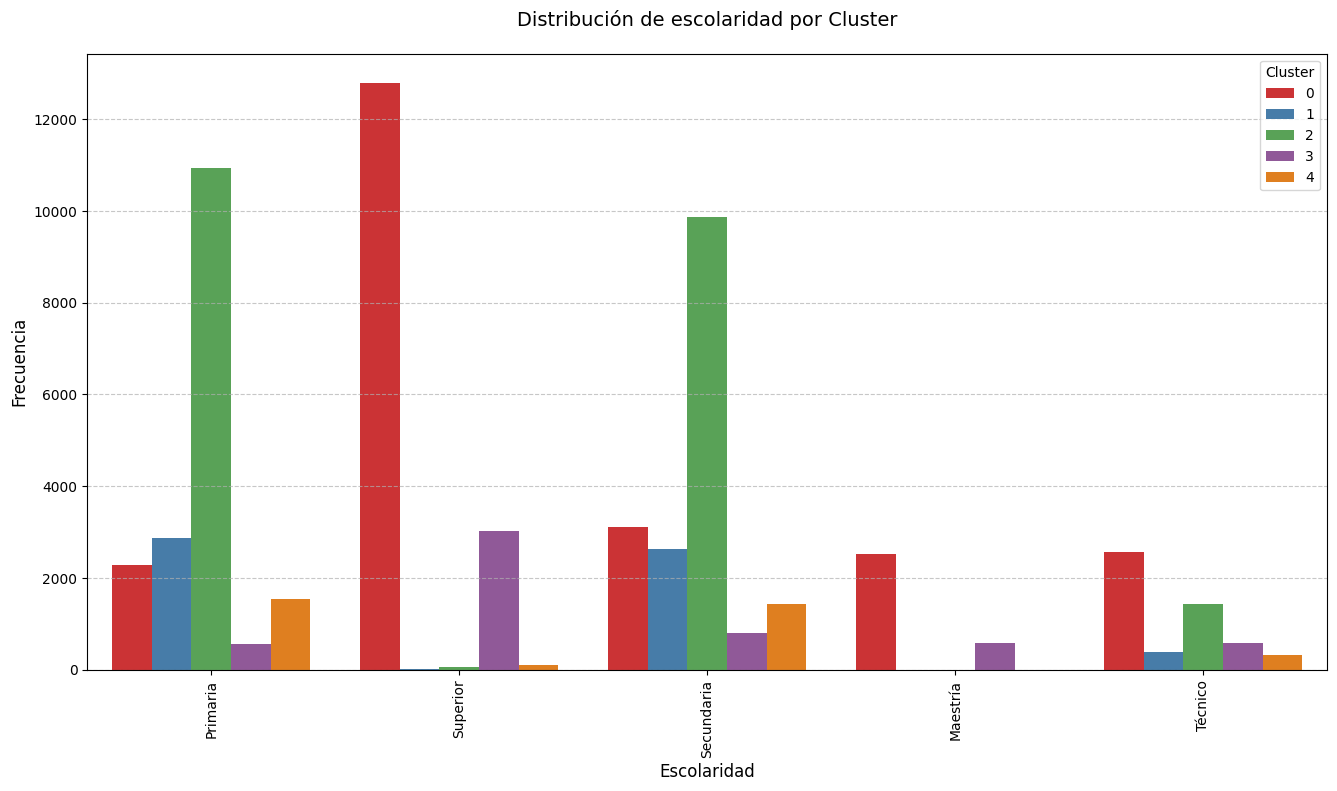

In [ ]:
distribuciones_clusters(df_filtrado, "escolaridad")

* Clusters Distintos: Cada cluster muestra una distribución diferente de los niveles de escolaridad, lo que sugiere que cada cluster representa un segmento de la población con características educativas distintas.

* Nivel de Escolaridad Dominante: En algunos clusters, un nivel de escolaridad específico parece ser más común. Por ejemplo, el cluster 0 muestra una alta proporción de personas con "Superior", mientras que el cluster 2 tiene una mayor concentración de personas con "Primaria" y "Secundaria".

* Implicaciones Socioeconómicas: La distribución de la escolaridad en los clusters puede reflejar diferencias socioeconómicas importantes. Los clusters con niveles de escolaridad más altos podrían tener mayores ingresos y oportunidades laborales, mientras que los clusters con niveles de escolaridad más bajos podrían enfrentar desafíos socioeconómicos.

* **En resumen, el gráfico revela una clara diferenciación en la distribución de la escolaridad entre los clusters. Cada cluster parece representar un segmento de la población con características educativas distintas. Esta información se puede utilizar para segmentar el mercado, personalizar ofertas y mejorar la experiencia del cliente.**

#### Distribucion del tipo de miembro

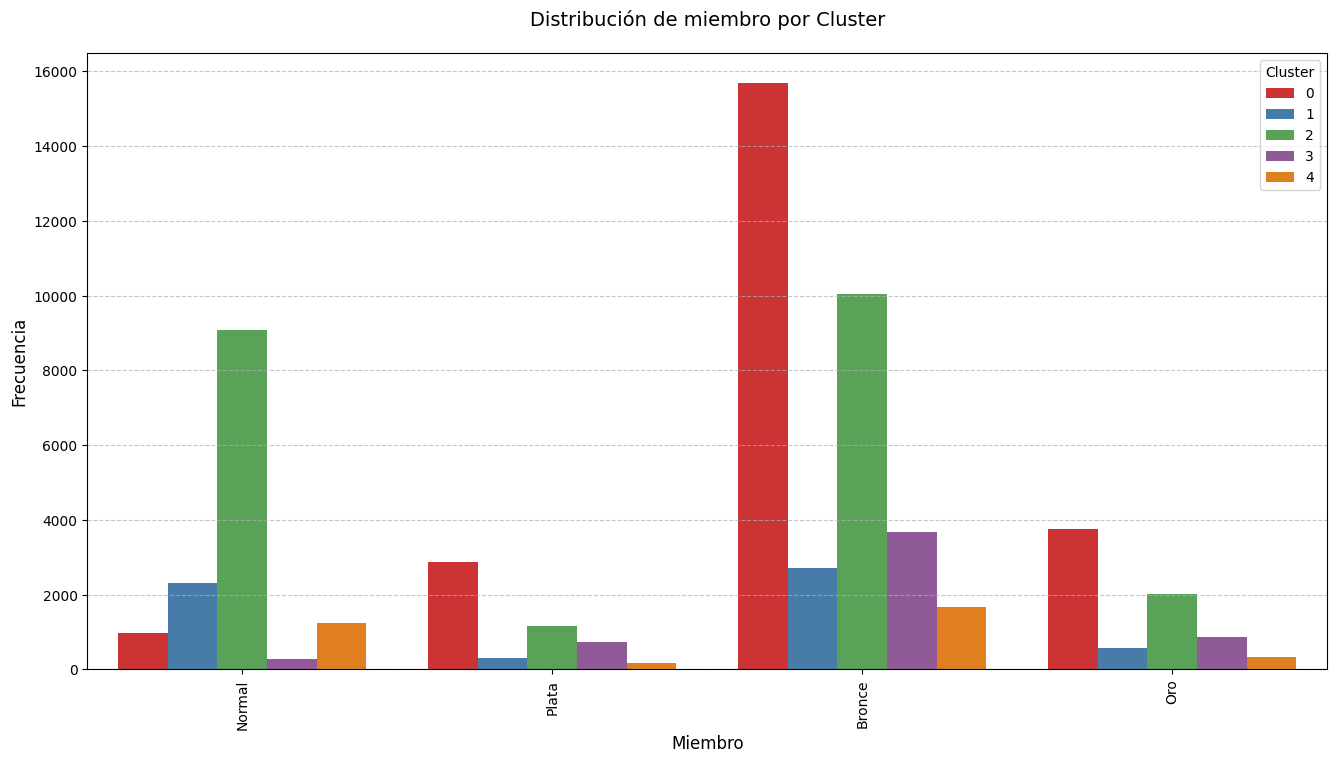

In [ ]:
distribuciones_clusters(df_filtrado, "miembro")

* Clusters Distintos: Cada cluster muestra una distribución diferente de los tipos de membresía, lo que sugiere que cada cluster representa un segmento de la población con diferentes preferencias o características.

* Membresía Dominante: En algunos clusters, un tipo de membresía específico parece ser más común. Por ejemplo, el cluster 0 muestra una alta proporción de miembros "Bronce", mientras que el cluster 2 tiene una mayor concentración de miembros "Normal".

* Implicaciones Socioeconómicas: La distribución de las membresías en los clusters puede reflejar diferencias socioeconómicas importantes. Los clusters con membresías de nivel más alto ("Oro", "Plata") podrían tener mayores ingresos y un mayor poder adquisitivo, mientras que los clusters con membresías de nivel más bajo ("Bronce", "Normal") podrían tener ingresos más modestos.

* Posible Segmentación: Esta información se puede utilizar para segmentar mercados y entender mejor los perfiles de los consumidores. Esto permite adaptar productos, servicios y mensajes de marketing a las necesidades y características de cada grupo. Inclusive para mejorar o incentivar para una membresia con un mejor nivel.

* **En resumen, el gráfico revela una clara diferenciación en la distribución de las membresías entre los clusters. Cada cluster parece representar un segmento de la población con características y preferencias distintas. Esta información se puede utilizar para segmentar el mercado, personalizar ofertas y mejorar la experiencia del cliente.**

#### Distribucion de la ocupacion

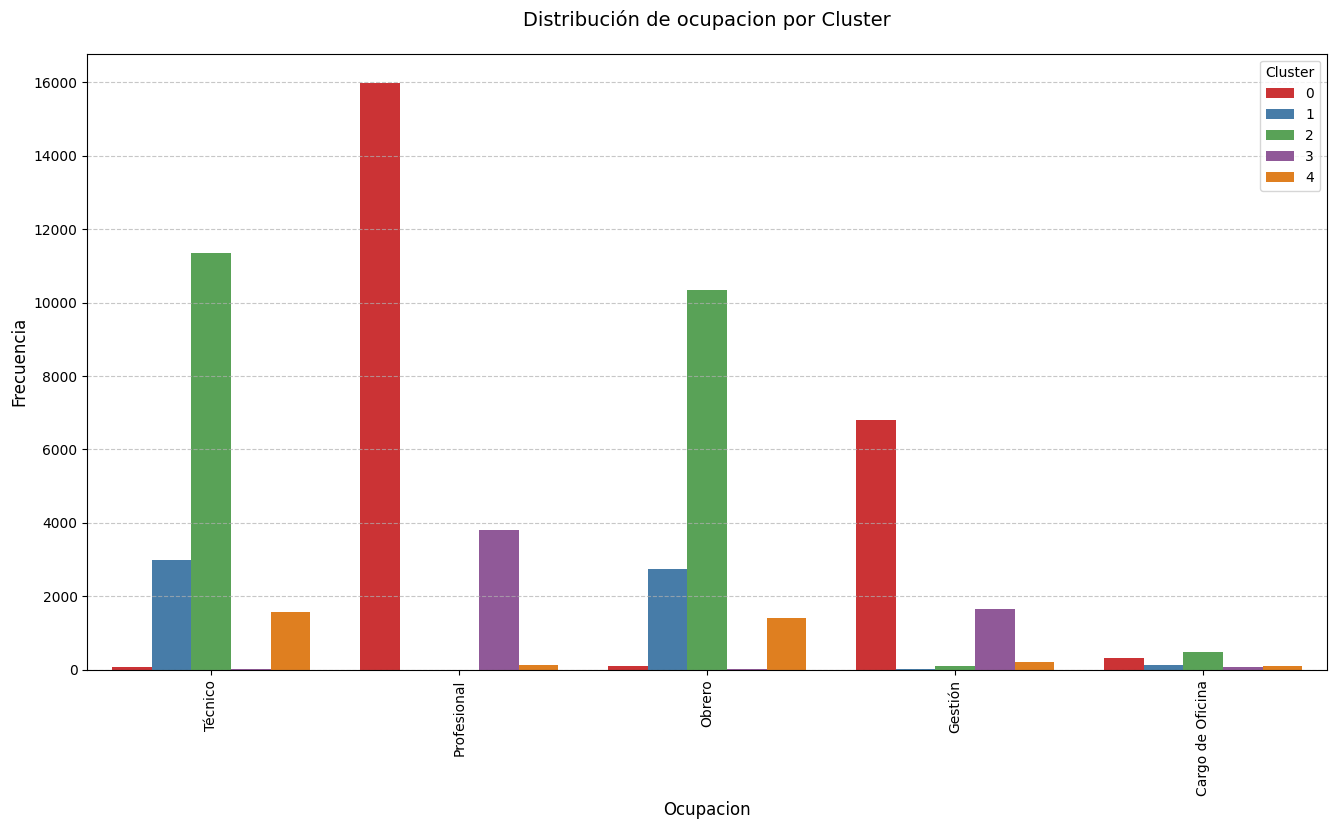

In [ ]:
distribuciones_clusters(df_filtrado,"ocupacion")

* Ocupación Dominante: En algunos clusters, una ocupación específica parece ser más común. Por ejemplo, el cluster 0 muestra una alta proporción de "Profesionales", mientras que el cluster 2 tiene una mayor concentración de "Obreros".

* Implicaciones Socioeconómicas: La distribución de las ocupaciones en los clusters puede reflejar diferencias socioeconómicas importantes. Los clusters con ocupaciones de nivel más alto ("Profesionales", "Gestión") podrían tener mayores ingresos y un mayor poder adquisitivo, mientras que los clusters con ocupaciones de nivel más bajo ("Obreros", "Tecnicos") podrían tener ingresos más modestos.

* **En resumen, el gráfico revela una clara diferenciación en la distribución de las ocupaciones entre los clusters. Cada cluster parece representar un segmento de la población con características laborales y socioeconómicas distintas. Esta información se puede utilizar para segmentar el mercado, personalizar ofertas y mejorar la experiencia del cliente.**